<a href="https://colab.research.google.com/github/teobras/My_Script-Articles/blob/main/Article_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalar Bibliotecas

In [76]:
# ===============================
# INSTALAR DE BIBLIOTECAS
# ===============================
%%capture
!pip install arch
!pip install termcolor
!pip install pmdarima
!pip install darts
!pip install optuna
!pip install xlsxwriter

# ===============================
# IMPORTAÇÃO DE BIBLIOTECAS
# ===============================

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
import pmdarima as pm

import statsmodels.api as sm
from arch import arch_model

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from darts import TimeSeries

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# 2. Carregar Dados

In [77]:
# ======================================================
# 1. Montar Google Drive no Colab
# ======================================================
from google.colab import drive
drive.mount('/content/drive')

# ======================================================
# 2. Importar bibliotecas necessárias
# ======================================================
import pandas as pd

# ======================================================
# 3. Definir caminhos dos ficheiros na Google Drive
#    (ajusta a pasta conforme onde guardaste)
# ======================================================

# Exemplo: ficheiros estão na pasta principal "My Drive"
path_cambio = '/content/drive/MyDrive/Colab_Notebooks/Datasets/cambio.csv'
path_inflacao = '/content/drive/MyDrive/Colab_Notebooks/Datasets/inflacao.csv'
path_petroleo='//content/drive/MyDrive/Colab_Notebooks/Datasets/petroleo.csv'

# Se forem ficheiros Excel:
# path_inflacao = '/content/drive/My Drive/INFL_BNA.xlsx'
# path_pib = '/content/drive/My Drive/PIB_BNA.xlsx'

# ======================================================
# 4. Carregar os datasets (CSV ou Excel)
# ======================================================

# Para CSV:
cambio = pd.read_csv(path_cambio)
inflacao = pd.read_csv(path_inflacao)
petroleo = pd.read_csv(path_petroleo)


# Para Excel (se for o caso):
# inflacao = pd.read_excel(path_inflacao)
# pib = pd.read_excel(path_pib)

# ======================================================
# 5. Ver 5 primeiras linhas
# ======================================================
print("\n Dados do Cambio:")
display(cambio.head())

print("\n Dados da Inflação:")
display(inflacao.head())

print("\n Dados do Petroleo:")
display(petroleo.head())

# ======================================================
# 6. Converter coluna Date para formato datetime
# ======================================================
cambio['date'] = pd.to_datetime(cambio['date'])
inflacao['date'] = pd.to_datetime(inflacao['date'])
petroleo['date'] = pd.to_datetime(petroleo['date'])

# ======================================================
# 7. Ordenar por data (opcional mas recomendado)
# ======================================================
cambio = cambio.sort_values('date')
inflacao = inflacao.sort_values('date')
petroleo = petroleo.sort_values('date')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Dados do Cambio:


date  cambio
0  2020-12-04  -0.340
1  2020-12-07  -0.368
2  2020-12-08  -0.393
3  2020-12-09  -0.384
4  2020-12-10  -0.399


 Dados da Inflação:


date  inflacao
0  2020-12-07      1.88
1  2020-12-08      1.89
2  2020-12-09      1.91
3  2020-12-10      1.88
4  2020-12-11      1.87


 Dados do Petroleo:


date  petroleo
0  2020-12-01     47.03
1  2020-12-02     47.80
2  2020-12-03     48.37
3  2020-12-04     49.10
4  2020-12-07     48.63

## 2.1. Gráfico das Séries Temporais Originais

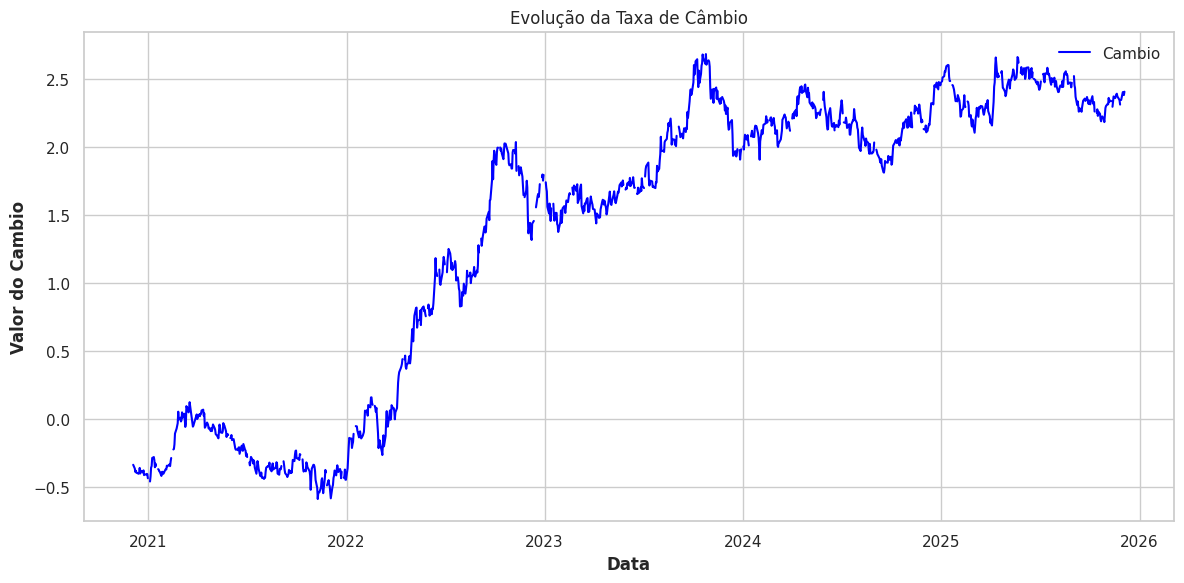

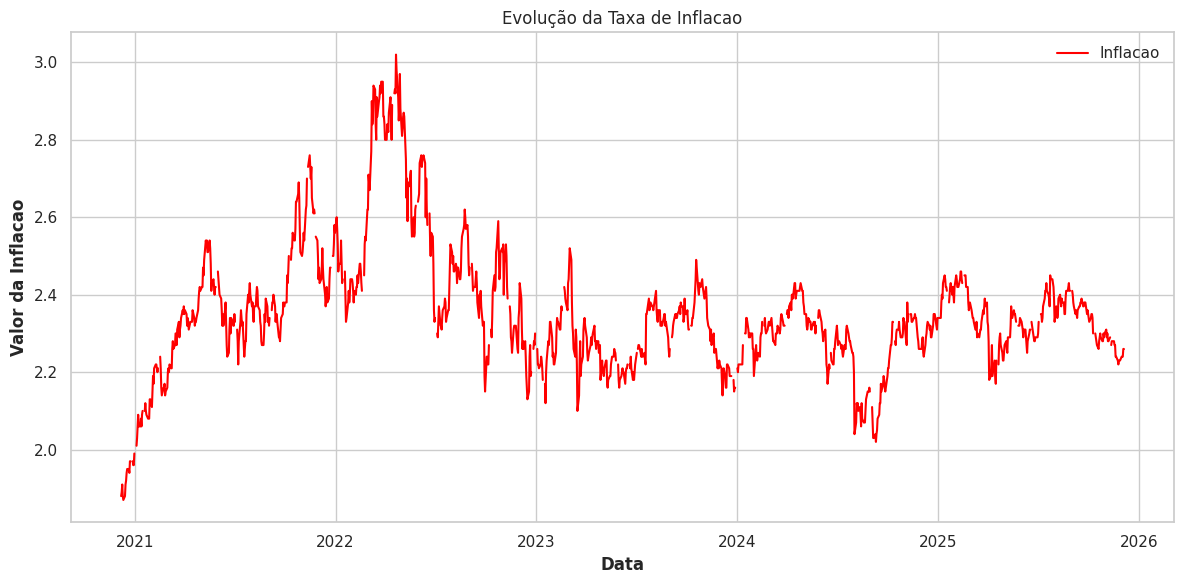

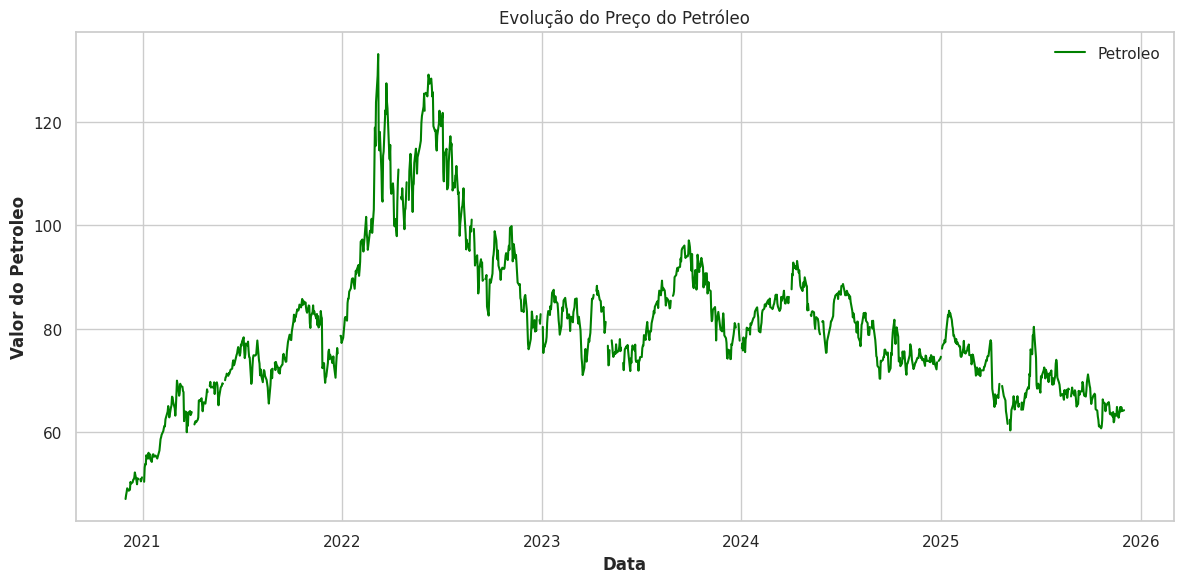

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Plotting Cambio
plt.figure(figsize=(12, 6))
plt.plot(cambio['date'], cambio['cambio'], label='Cambio', color='blue')
plt.title('Evolução da Taxa de Câmbio')
plt.xlabel('Data')
plt.ylabel('Valor do Cambio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Inflacao
plt.figure(figsize=(12, 6))
plt.plot(inflacao['date'], inflacao['inflacao'], label='Inflacao', color='red')
plt.title('Evolução da Taxa de Inflacao')
plt.xlabel('Data')
plt.ylabel('Valor da Inflacao')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Petroleo
plt.figure(figsize=(12, 6))
plt.plot(petroleo['date'], petroleo['petroleo'], label='Petroleo', color='green')
plt.title('Evolução do Preço do Petróleo')
plt.xlabel('Data')
plt.ylabel('Valor do Petroleo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2.1.1. Explicação dos gráficos das Séries Originais

Os gráficos gerados mostram a evolução das séries temporais originais para o Câmbio, Inflação e Petróleo. Vamos analisá-los individualmente e as suas implicações económicas:

**1. Evolução da Taxa de Câmbio (Cambio):**

Descrição do Gráfico: Este gráfico mostra as flutuações do valor do câmbio ao longo do tempo. Podemos observar períodos de relativa estabilidade, mas também momentos de forte apreciação (queda na linha) e depreciação (subida acentuada na linha).
Implicação Económica: A taxa de câmbio é vital para a economia. Uma depreciação da moeda (câmbio a subir) torna as importações mais caras (o que pode levar à inflação importada) e as exportações mais baratas (favorecendo exportadores). Uma apreciação (câmbio a descer) tem o efeito oposto. Fortes flutuações cambiais indicam instabilidade, afetando a confiança dos investidores e a capacidade de planeamento de empresas e indivíduos. Para uma economia como a angolana (assumindo o Kwanza como moeda e o USD como referência), uma subida no gráfico indica a necessidade de mais Kwanza para um Dólar, ou seja, desvalorização da moeda nacional.
**2. Evolução da Taxa de Inflação (Inflacao):**

Descrição do Gráfico: Este gráfico ilustra a variação percentual dos preços ao consumidor. Geralmente, vemos picos e vales que indicam períodos de aceleração e desaceleração inflacionária. A série pode mostrar uma tendência geral de subida, descida ou estabilização, juntamente com flutuações de curto prazo.
Implicação Económica: A inflação afeta diretamente o poder de compra da população. Uma inflação alta e volátil corrói o valor da moeda, aumenta a incerteza e pode desincentivar o investimento. Bancos centrais utilizam políticas monetárias (como ajuste das taxas de juros) para tentar controlar a inflação dentro de metas consideradas saudáveis para a economia. Picos de inflação podem ser causados por fatores como choques de oferta, aumento da massa monetária ou desvalorização cambial.
**3. Evolução do Preço do Petróleo (Petroleo):**

Descrição do Gráfico: Este gráfico representa o preço do petróleo (e.g., Brent ou WTI). Vemos que o preço do petróleo é altamente volátil, com períodos de forte subida e descida. É comum observar tendências de longo prazo influenciadas pela oferta e demanda globais, eventos geopolíticos e crises económicas.
Implicação Económica: Para países exportadores de petróleo (como Angola), o preço do petróleo é o principal motor das receitas do Estado e da balança comercial. Um aumento no preço do petróleo geralmente significa maiores receitas em moeda estrangeira, o que pode fortalecer a moeda local e permitir mais investimento público. Por outro lado, uma queda nos preços do petróleo pode levar a déficits orçamentais, desvalorização da moeda e cortes nos gastos públicos. Para países importadores, o efeito é inverso.

**Interligações e Observações Gerais:** É provável que os gráficos mostrem alguma correlação entre si. Por exemplo, uma queda acentuada no preço do petróleo pode levar a uma desvalorização da moeda nacional em países exportadores e, consequentemente, a um aumento da inflação (devido ao encarecimento das importações). A análise conjunta destas séries é crucial para entender a dinâmica macroeconómica e formular políticas eficazes.

# 3. Limpeza e Preparação de Dados

In [80]:
# -------------------------------------------
# 1. IMPORTAR BIBLIOTECAS
# -------------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# --------------------------------------------
# 2. LIMPAR OS NOMES DAS COLUNAS
# -------------------------------------------
cambio.columns   = cambio.columns.str.strip()
inflacao.columns = inflacao.columns.str.strip()
petroleo.columns = petroleo.columns.str.strip()

# Identificar colunas de datas automaticamente
possiveis_datas = ['Date', 'DATA', 'Data', 'date', 'Periodo', 'periodo']

# Resetar o índice se a coluna de data já for o índice
if cambio.index.name in possiveis_datas:
    cambio = cambio.reset_index()
if inflacao.index.name in possiveis_datas:
    inflacao = inflacao.reset_index()
if petroleo.index.name in possiveis_datas:
    petroleo = petroleo.reset_index()

col_data_cambio   = [c for c in cambio.columns if c in possiveis_datas][0]
col_data_inflacao = [c for c in inflacao.columns if c in possiveis_datas][0]
col_data_petroleo = [c for c in petroleo.columns if c in possiveis_datas][0]

# Converter para datetime
cambio[col_data_cambio]       = pd.to_datetime(cambio[col_data_cambio])
inflacao[col_data_inflacao]   = pd.to_datetime(inflacao[col_data_inflacao])
petroleo[col_data_petroleo]   = pd.to_datetime(petroleo[col_data_petroleo])

# Ordenar
cambio    = cambio.sort_values(col_data_cambio)
inflacao  = inflacao.sort_values(col_data_inflacao)
petroleo  = petroleo.sort_values(col_data_petroleo)

# -------------------------------------------
# 3. REMOVER MISSING VALUES
# -------------------------------------------
cambio   = cambio.dropna()
inflacao = inflacao.dropna()
petroleo = petroleo.dropna()

print("Após remoção de missing:")
print(cambio.isna().sum())
print(inflacao.isna().sum())
print(petroleo.isna().sum())

# -------------------------------------------
# 4. AJUSTES / CRIAR LOG-TRANSFORMATION
# -------------------------------------------
# Criar colunas log (somente se valores > 0)

# Câmbio
if (cambio.iloc[:,1] > 0).all():
    cambio["log_cambio"] = np.log(cambio.iloc[:,1])
else:
    print("⚠ Câmbio contém valores <= 0 — log não aplicado.")

# Inflação
if (inflacao.iloc[:,1] > 0).all():
    inflacao["log_inflacao"] = np.log(inflacao.iloc[:,1])
else:
    print("⚠ Inflação contém valores <= 0 — log não aplicado.")

# Petróleo
if (petroleo.iloc[:,1] > 0).all():
    petroleo["log_petroleo"] = np.log(petroleo.iloc[:,1])
else:
    print("⚠ Petróleo contém valores <= 0 — log não aplicado.")

# -------------------------------------------
# 5. UNIFICAR FREQUÊNCIA TEMPORAL (mensal)
# -------------------------------------------
cambio    = cambio.set_index(col_data_cambio).resample("M").mean()
inflacao  = inflacao.set_index(col_data_inflacao).resample("M").mean()
petroleo  = petroleo.set_index(col_data_petroleo).resample("M").mean()

# Interpolar valores faltantes
cambio    = cambio.interpolate()
inflacao  = inflacao.interpolate()
petroleo  = petroleo.interpolate()

# -------------------------------------------
# 6. JUNTAR NUM ÚNICO DATAFRAME
# -------------------------------------------
df = cambio.merge(inflacao, left_index=True, right_index=True, how="inner")\
           .merge(petroleo, left_index=True, right_index=True, how="inner")\
           .merge(cambio, left_index=True, right_index=True, how="inner")

# Renomear colunas
# A lista de colunas precisa corresponder ao número de colunas no df.
# Como 'log_cambio' não foi criado, removemos ele da lista de renomeação.
df.columns = ["Cambio","log_cambio","Inflacao", "log_inflacao", "Petroleo", "log_petroleo"]

# -------------------------------------------
# 7. NORMALIZAÇÃO
# -------------------------------------------
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns,
    index=df.index
)

print("\n LIMPEZA E PREPARAÇÃO CONCLUÍDA!")
display(df_scaled.head())

Após remoção de missing:
date      0
cambio    0
dtype: int64
date            0
inflacao        0
log_inflacao    0
dtype: int64
date            0
petroleo        0
log_petroleo    0
dtype: int64
⚠ Câmbio contém valores <= 0 — log não aplicado.

 LIMPEZA E PREPARAÇÃO CONCLUÍDA!


Cambio  log_cambio  Inflacao  log_inflacao  Petroleo  \
date                                                                 
2020-12-31  0.020635    0.000000  0.000000      0.000000  0.000000   
2021-01-31  0.028369    0.158888  0.188236      0.065739  0.101700   
2021-02-28  0.075627    0.262055  0.303255      0.168912  0.244659   
2021-03-31  0.154985    0.361863  0.409691      0.212004  0.299330   
2021-04-30  0.143793    0.439775  0.489725      0.203705  0.289007   

            log_petroleo  
date                      
2020-12-31      0.020635  
2021-01-31      0.028369  
2021-02-28      0.075627  
2021-03-31      0.154985  
2021-04-30      0.143793

# 4. Análise Exploratória de Dados

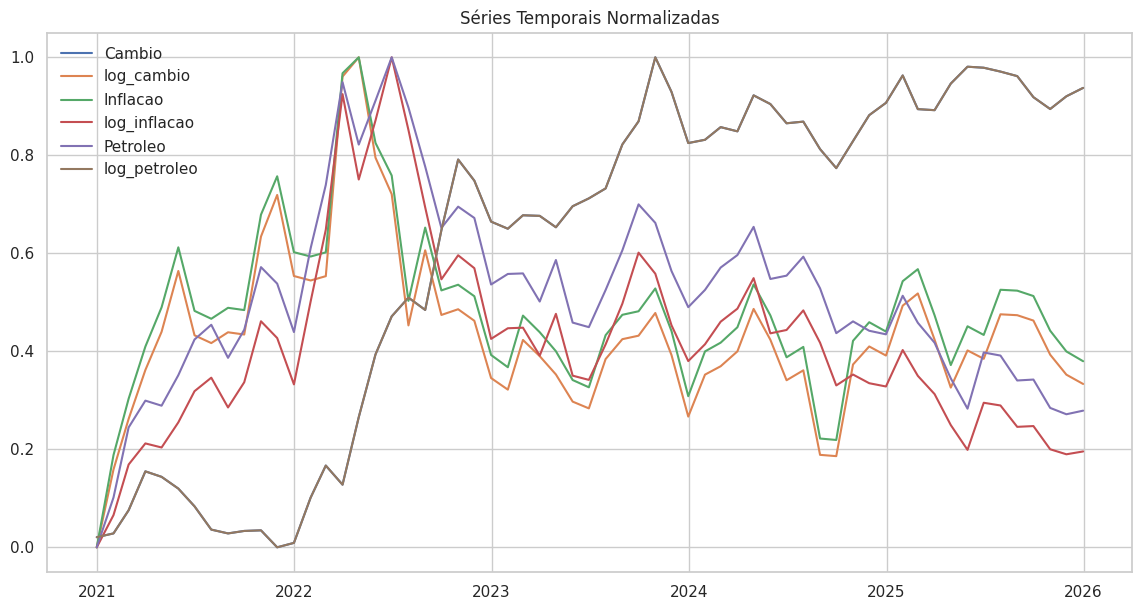


### DECOMPOSIÇÃO DA SÉRIE — Cambio ###


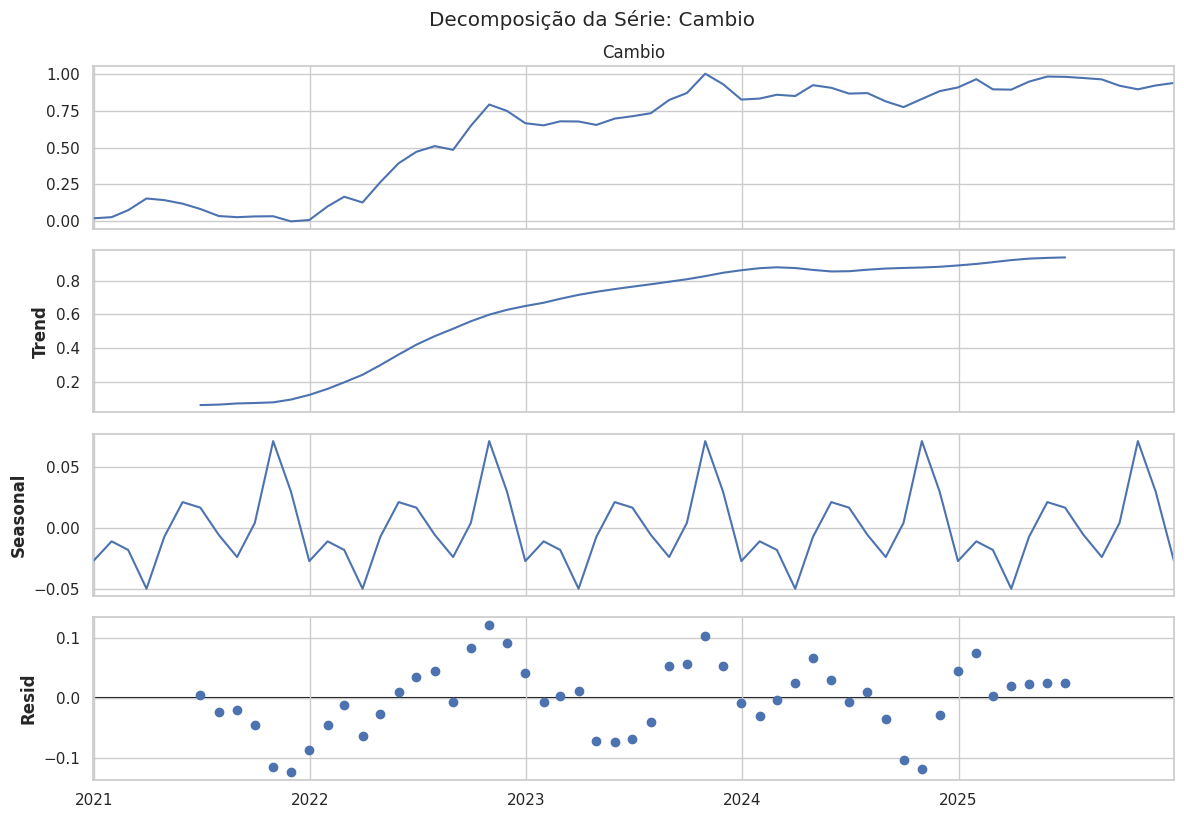


### DECOMPOSIÇÃO DA SÉRIE — log_cambio ###


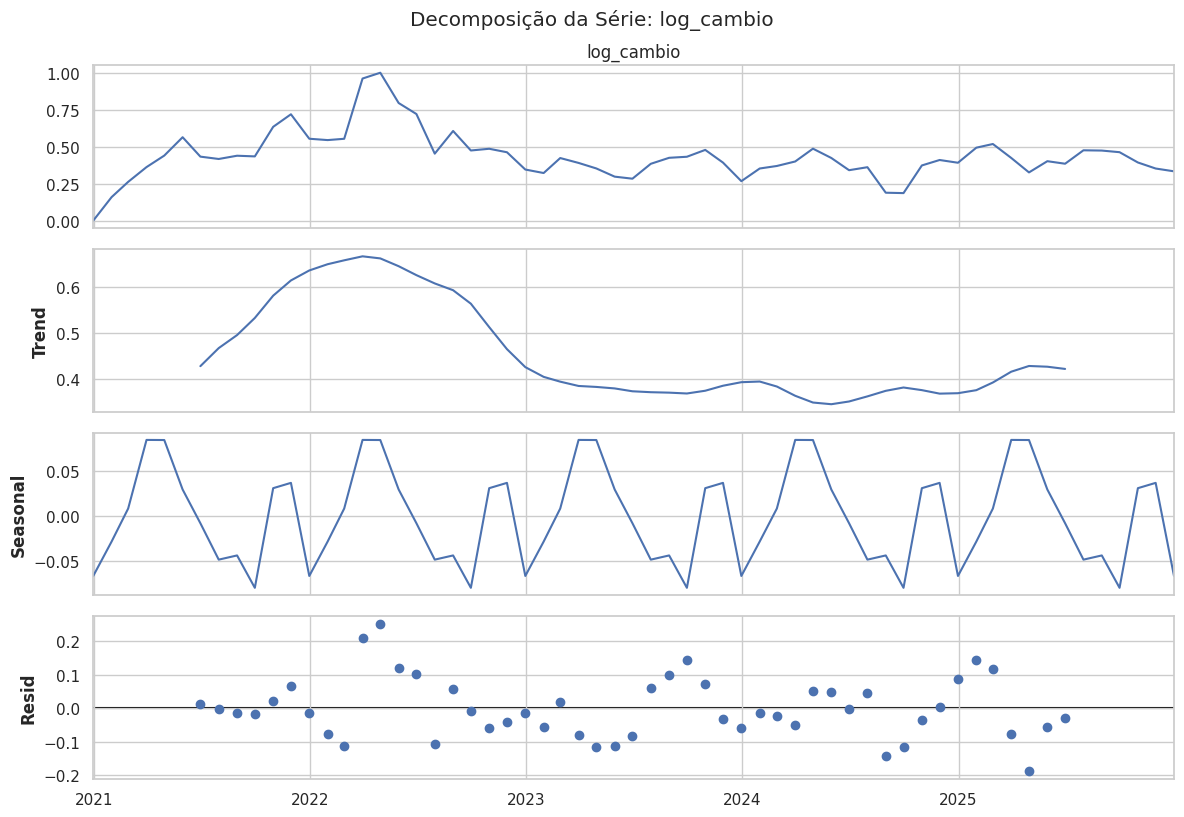


### DECOMPOSIÇÃO DA SÉRIE — Inflacao ###


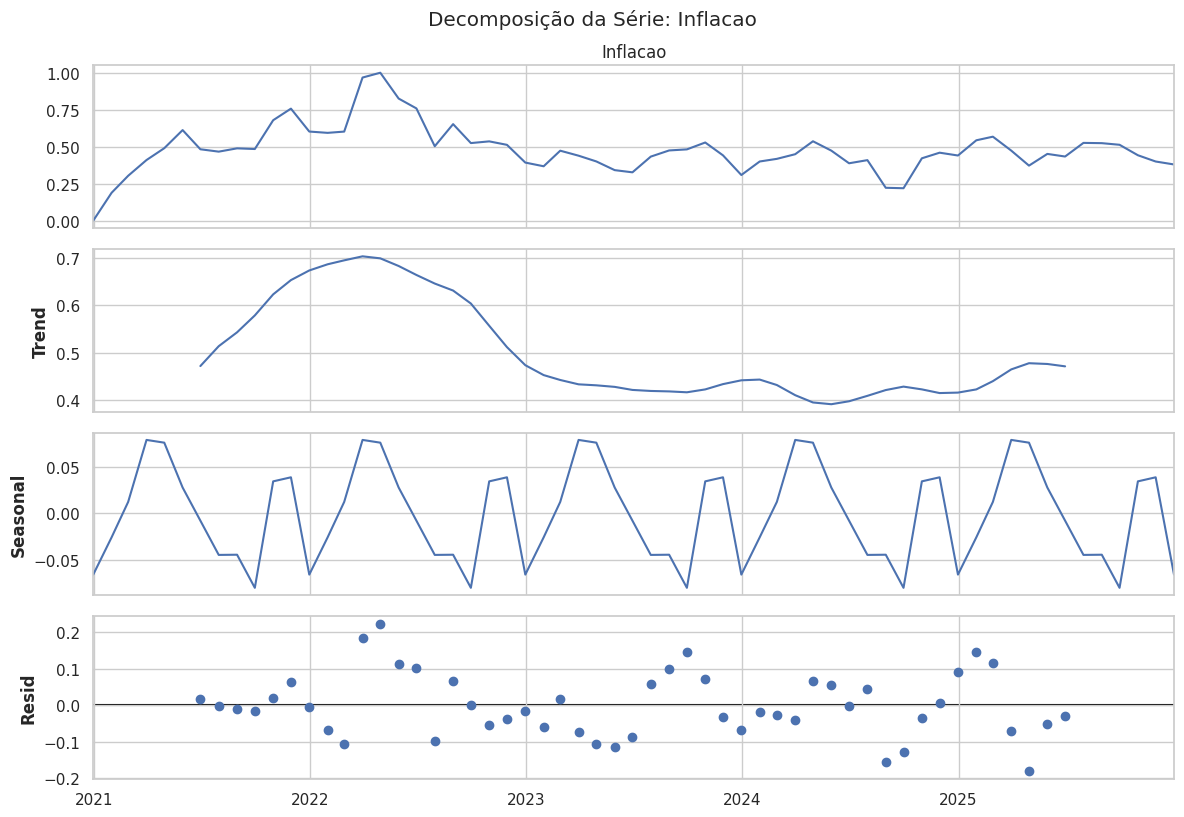


### DECOMPOSIÇÃO DA SÉRIE — log_inflacao ###


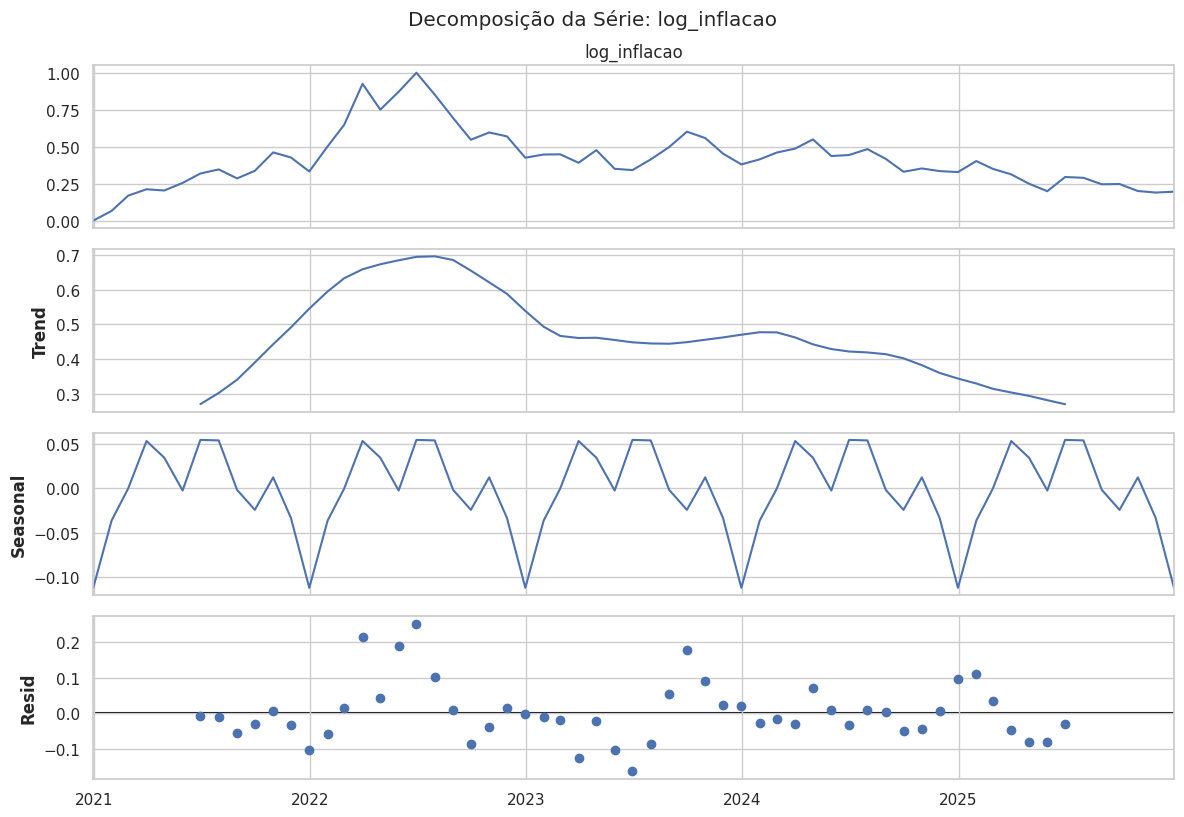


### DECOMPOSIÇÃO DA SÉRIE — Petroleo ###


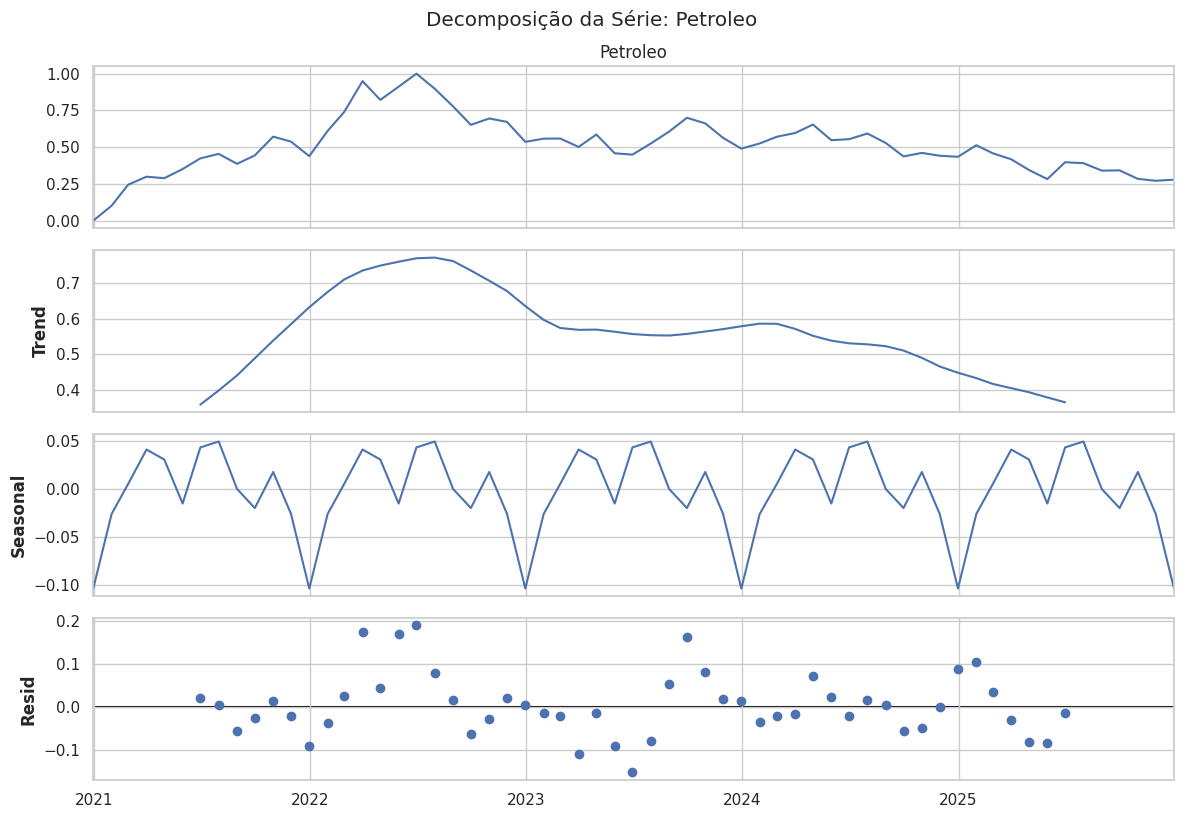


### DECOMPOSIÇÃO DA SÉRIE — log_petroleo ###


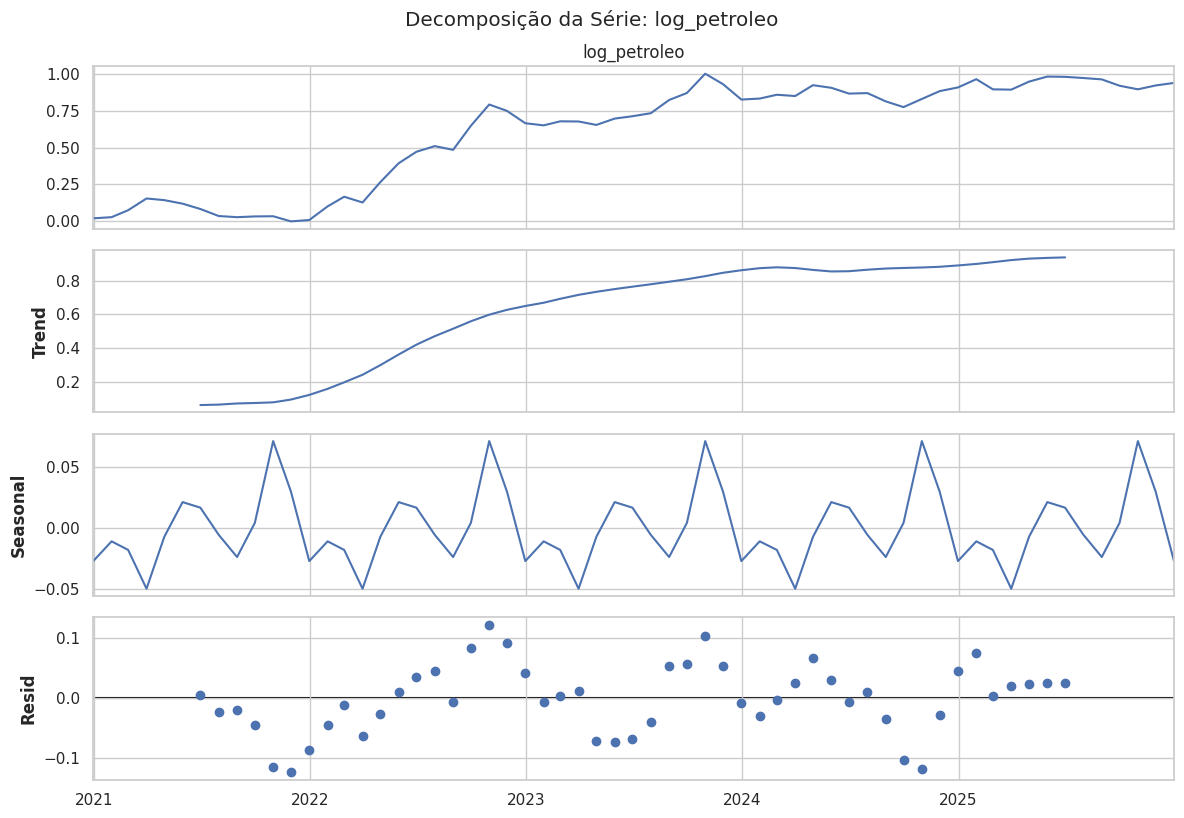

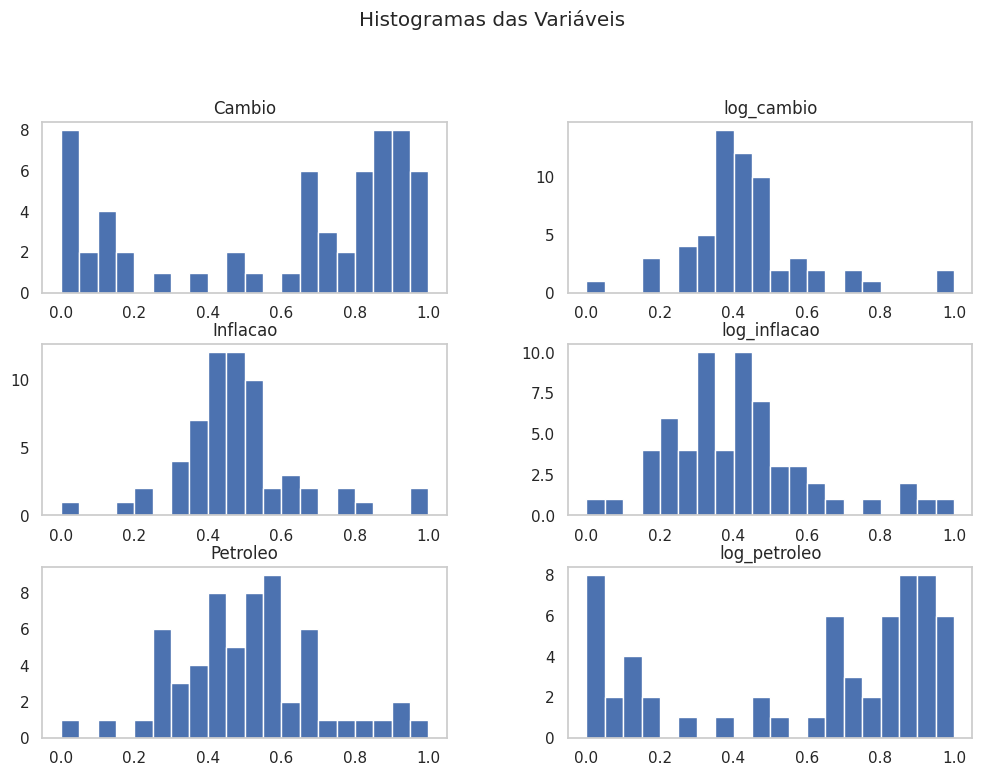

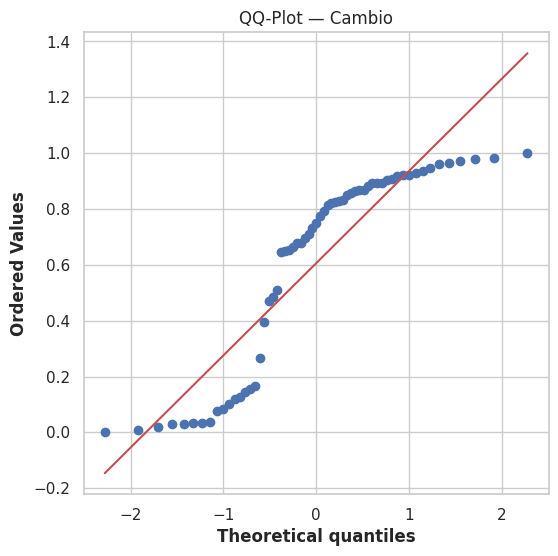

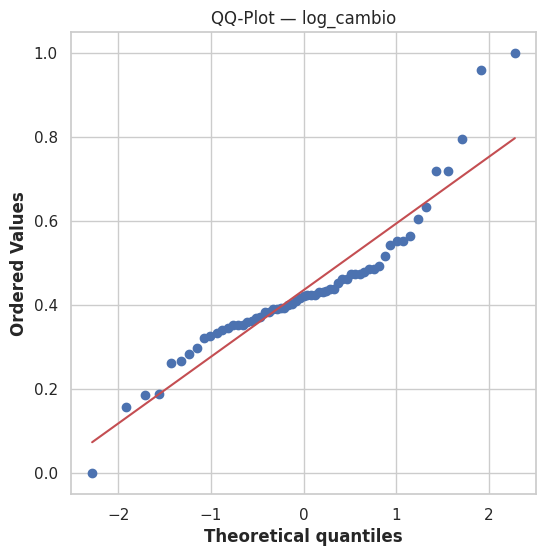

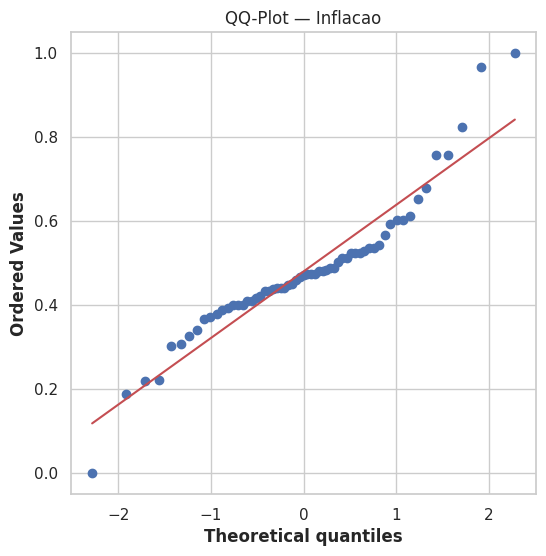

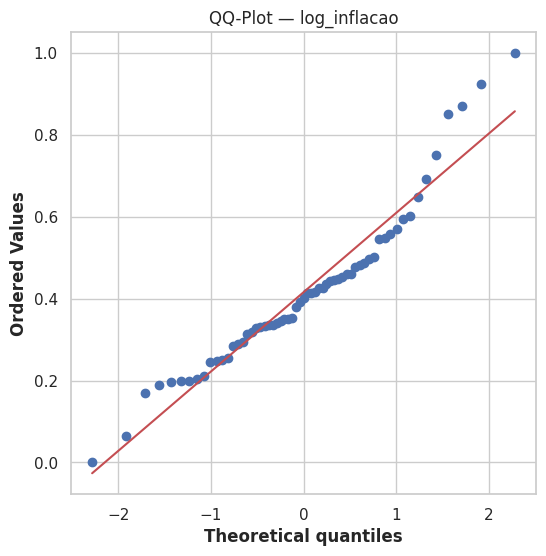

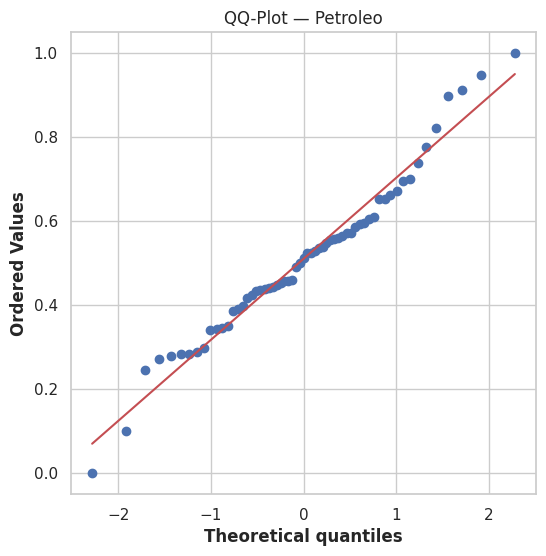

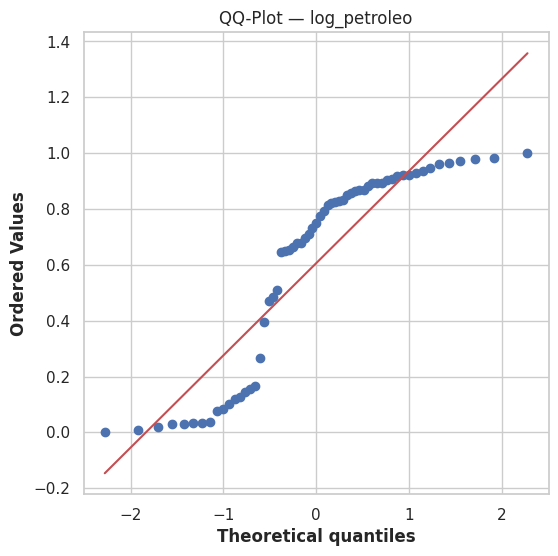

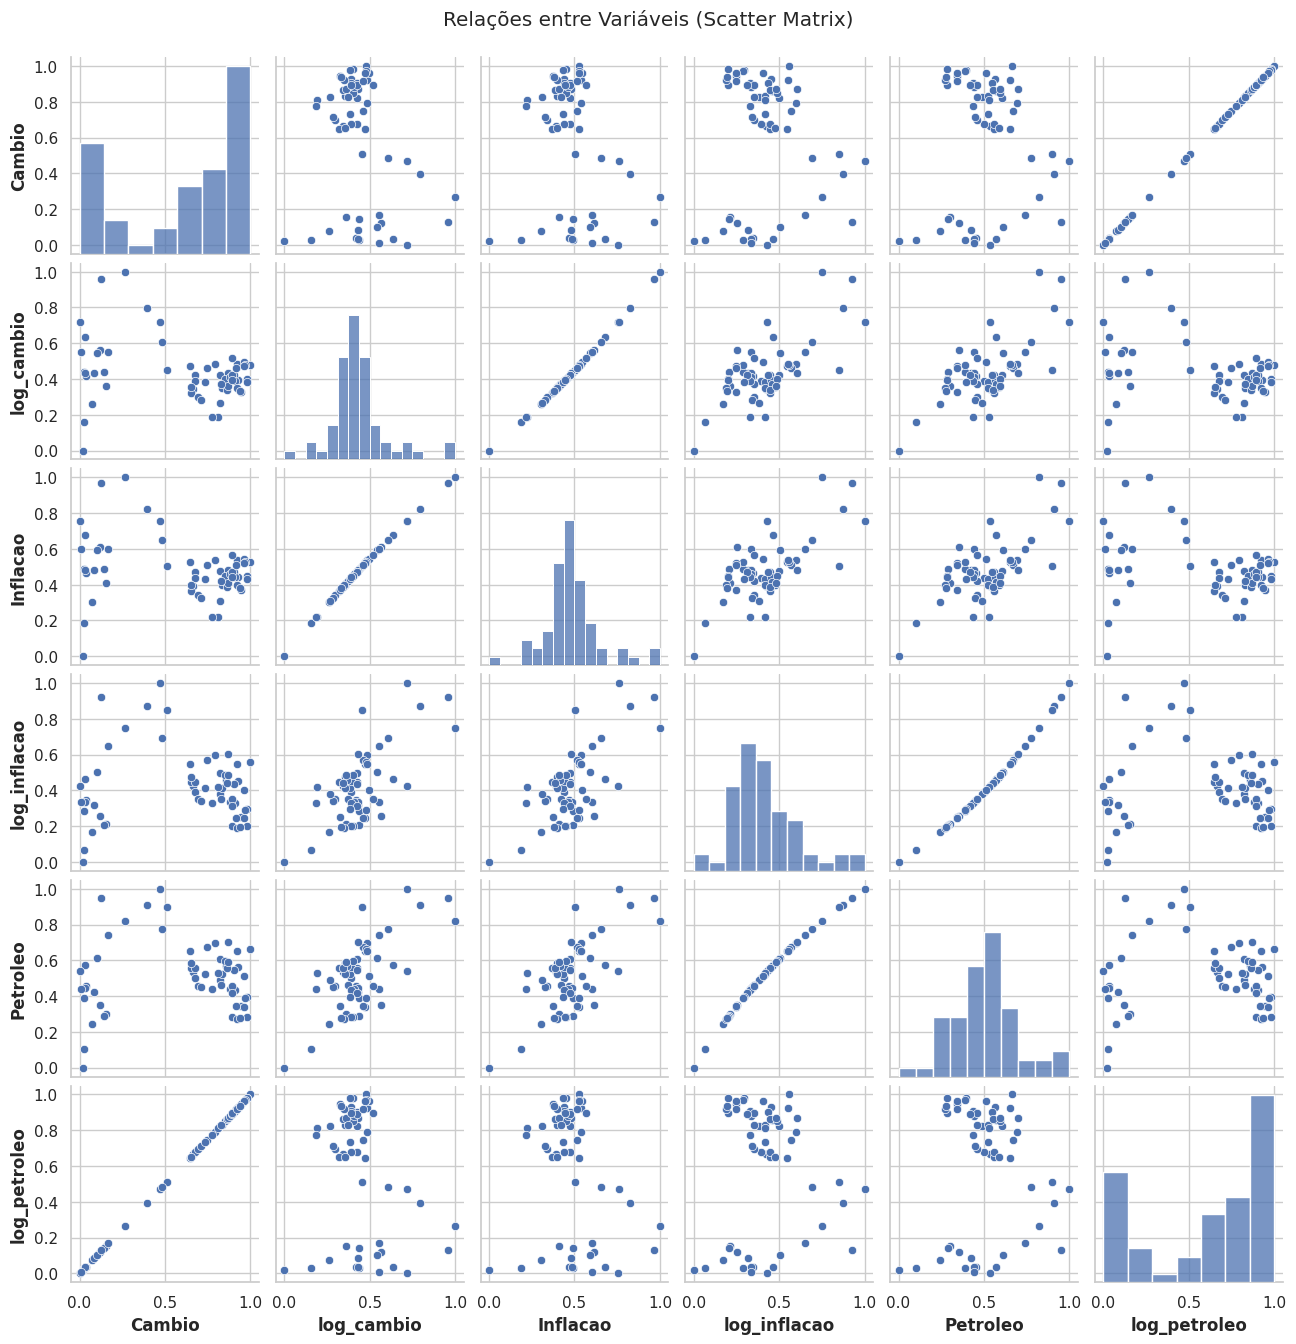

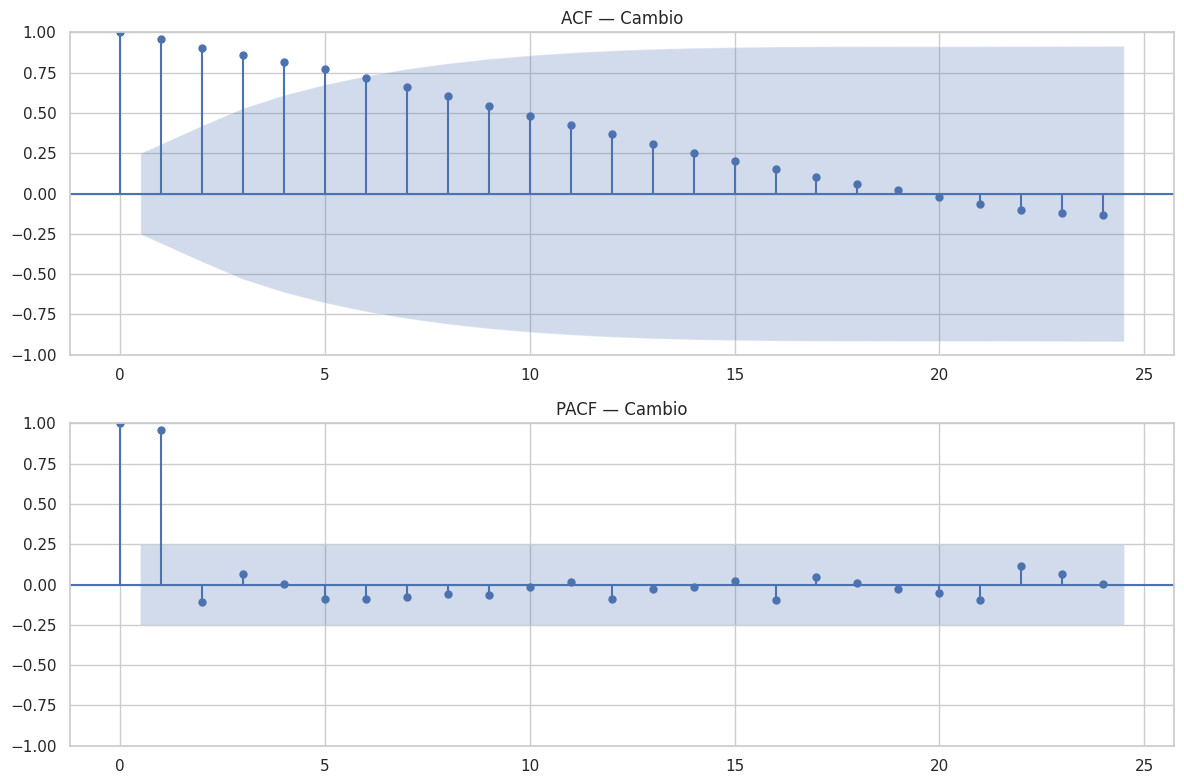

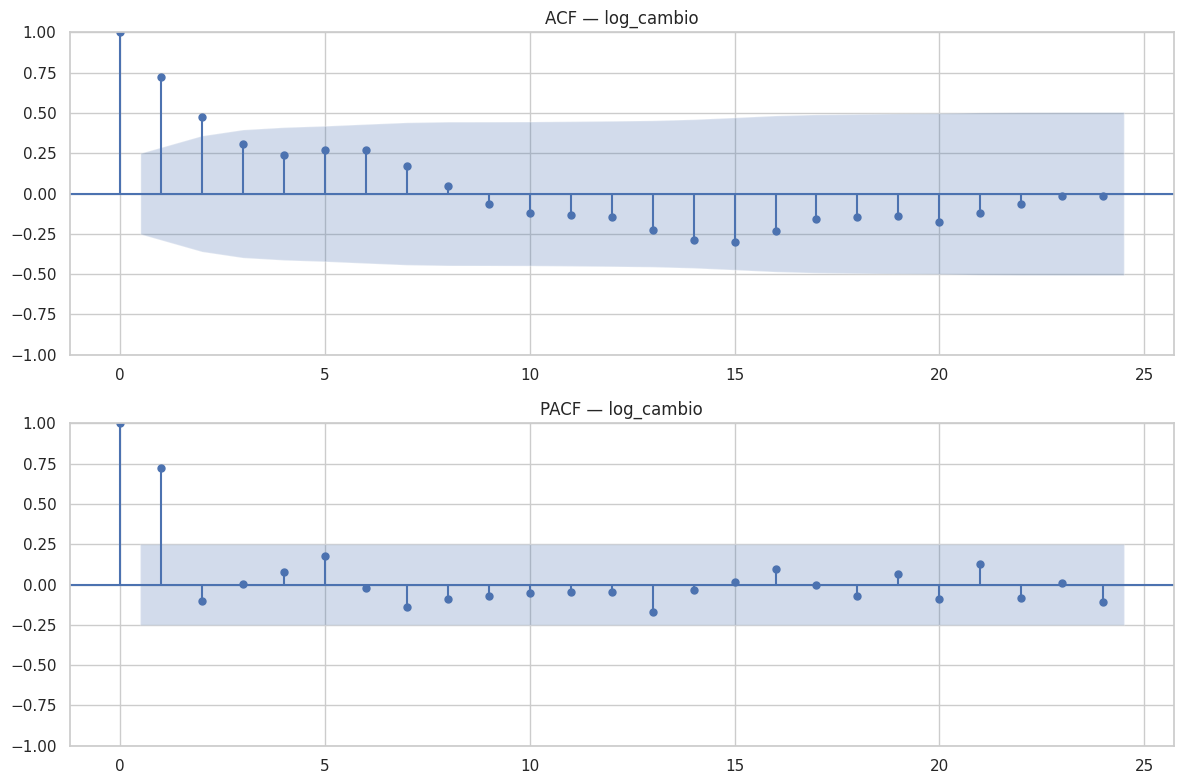

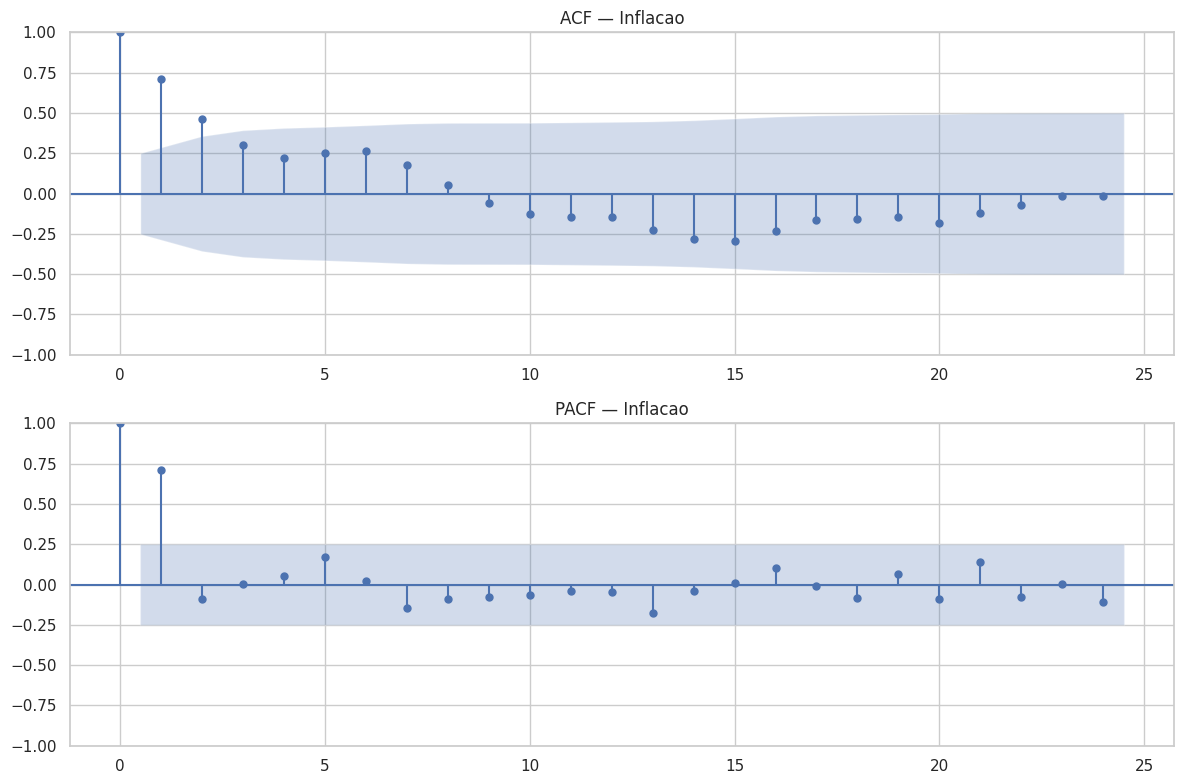

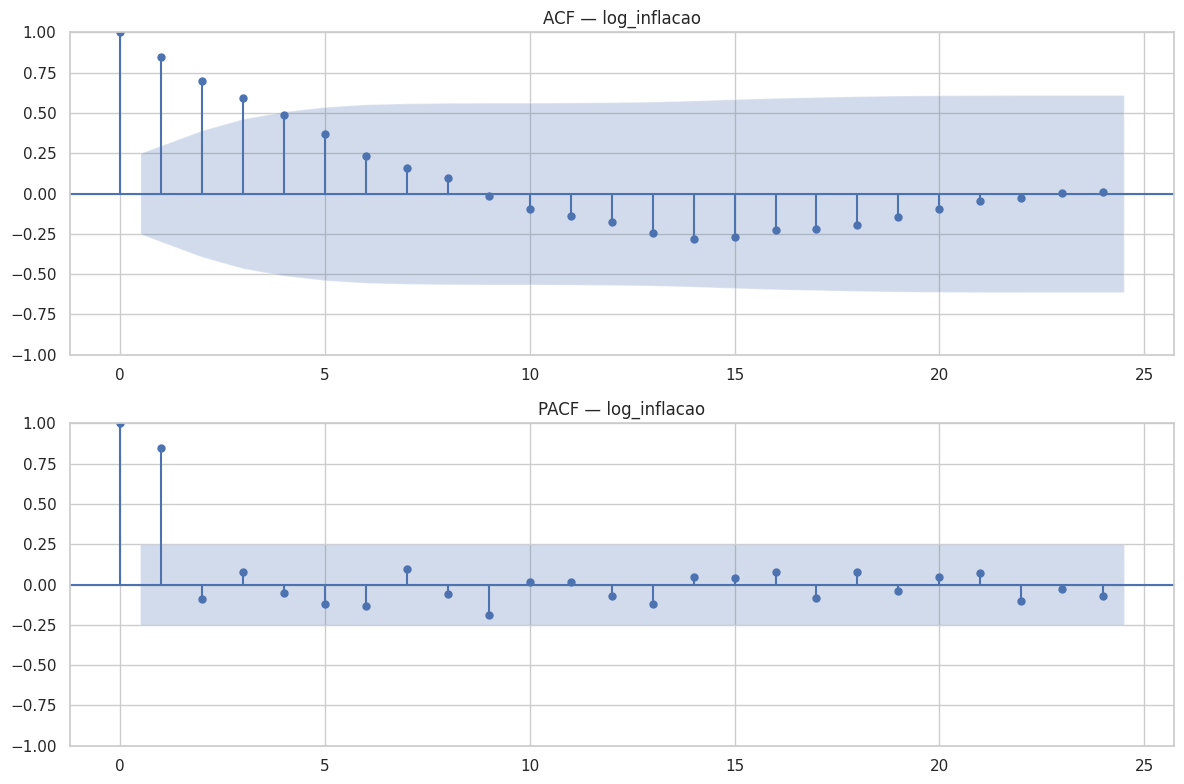

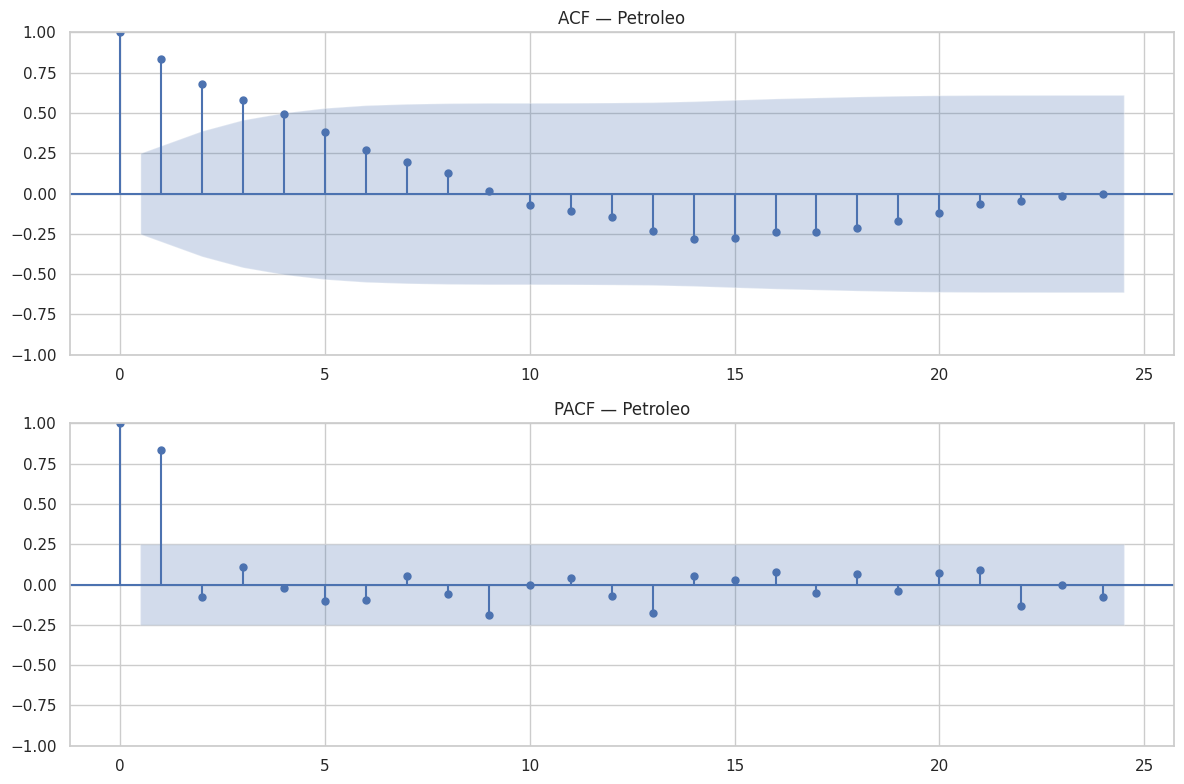

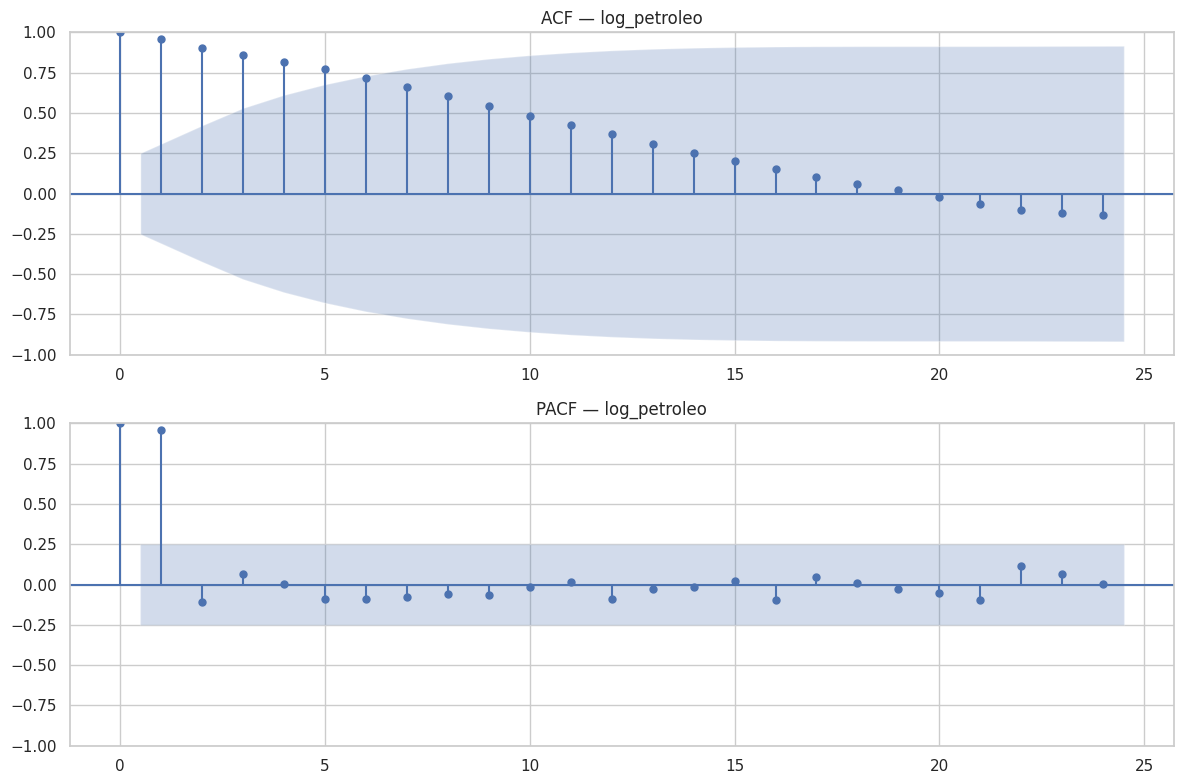

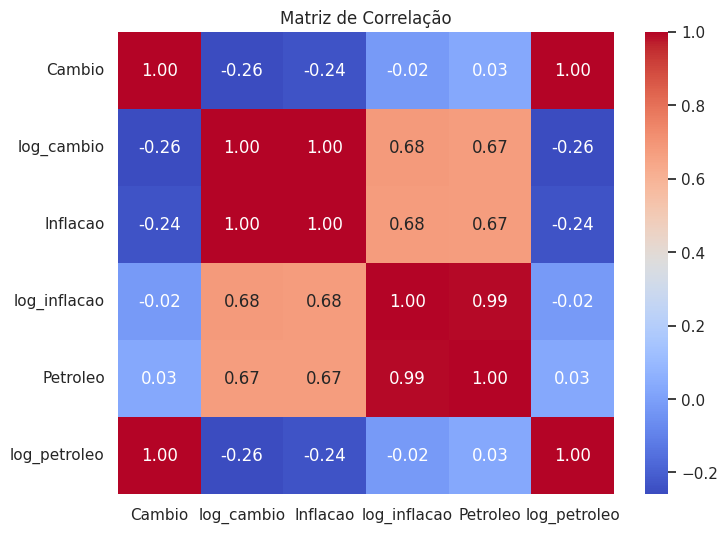


 ESTATÍSTICAS DESCRITIVAS


Cambio  log_cambio   Inflacao  log_inflacao   Petroleo  log_petroleo
count  61.000000   61.000000  61.000000     61.000000  61.000000     61.000000
mean    0.605679    0.435819   0.480396      0.415862   0.510409      0.605679
std     0.352506    0.164982   0.163005      0.195682   0.191357      0.352506
min     0.000000    0.000000   0.000000      0.000000   0.000000      0.000000
25%     0.166828    0.352725   0.400133      0.294993   0.397611      0.166828
50%     0.748237    0.423149   0.472860      0.402611   0.513366      0.748237
75%     0.894206    0.478187   0.528255      0.487021   0.596423      0.894206
max     1.000000    1.000000   1.000000      1.000000   1.000000      1.000000

In [83]:
# -------------------------------------------------------------
# 1. IMPORTAR BIBLIOTECAS
# -------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats

sns.set(style="whitegrid")

variaveis = df_scaled.columns  # Lista automática das variáveis


# -------------------------------------------------------------
# 2. GRÁFICOS DAS SÉRIES TEMPORAIS (TODAS)
# -------------------------------------------------------------
plt.figure(figsize=(14, 7))
for col in variaveis:
    plt.plot(df_scaled.index, df_scaled[col], label=col)
plt.title("Séries Temporais Normalizadas")
plt.legend()
plt.show()


# -------------------------------------------------------------
# 3. DECOMPOSIÇÃO DAS SÉRIES (TODAS)
# -------------------------------------------------------------
for col in variaveis:
    print(f"\n### DECOMPOSIÇÃO DA SÉRIE — {col} ###")
    decomp = seasonal_decompose(df_scaled[col], model='additive', period=12)
    plt.rcParams["figure.figsize"] = (12, 8)
    decomp.plot()
    plt.suptitle(f"Decomposição da Série: {col}", y=1.02)
    plt.show()


# -------------------------------------------------------------
# 4. HISTOGRAMAS (TODOS)
# -------------------------------------------------------------
df_scaled.hist(figsize=(12, 8), bins=20, grid=False)
plt.suptitle("Histogramas das Variáveis", y=1.02)
plt.show()


# -------------------------------------------------------------
# 5. QQ-PLOTS (TODOS)
# -------------------------------------------------------------
for col in variaveis:
    plt.figure(figsize=(6, 6))
    stats.probplot(df_scaled[col], dist="norm", plot=plt)
    plt.title(f"QQ-Plot — {col}")
    plt.show()


# -------------------------------------------------------------
# 6. RELAÇÃO ENTRE VARIÁVEIS (SCATTER MATRIX)
# -------------------------------------------------------------
sns.pairplot(df_scaled, height=2.2)
plt.suptitle("Relações entre Variáveis (Scatter Matrix)", y=1.02)
plt.show()


# -------------------------------------------------------------
# 7. ACF e PACF (TODOS)
# -------------------------------------------------------------
for col in variaveis:
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(df_scaled[col], ax=ax[0], lags=24)
    plot_pacf(df_scaled[col], ax=ax[1], lags=24, method="ywm")
    ax[0].set_title(f"ACF — {col}")
    ax[1].set_title(f"PACF — {col}")
    plt.tight_layout()
    plt.show()


# -------------------------------------------------------------
# 8. MATRIZ DE CORRELAÇÃO
# -------------------------------------------------------------
plt.figure(figsize=(8, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


# -------------------------------------------------------------
# 9. ESTATÍSTICAS DESCRITIVAS (TODAS)
# -------------------------------------------------------------
print("\n ESTATÍSTICAS DESCRITIVAS")
display(df_scaled.describe())


# 4.1 - Explicação Detalhada da Análise Exploratória de Dados

A Análise Exploratória de Dados (AED) é crucial para compreender a estrutura e o comportamento das séries temporais de Câmbio, Inflação e Petróleo. Abaixo, detalhamos as observações e implicações económicas de cada visualização e estatística gerada:

---

### 1. Gráficos de Séries Temporais Normalizadas (Visualização Conjunta)

Este gráfico apresenta as séries temporais de Câmbio, Inflação e Petróleo, juntamente com suas versões logarítmicas, todas normalizadas para uma escala entre 0 e 1.

*   **Tendências Gerais**: Observa-se que, após a normalização, as séries apresentam tendências variadas. Existem períodos de movimentos coordenados onde as variáveis sobem ou descem em conjunto, sugerindo fatores económicos subjacentes comuns. Por exemplo, pode haver períodos em que o preço do Petróleo e a Inflação se movem na mesma direção, ou o Câmbio segue uma tendência similar à Inflação. Contudo, há também momentos de divergência, indicando que cada variável possui drivers específicos.
*   **Volatilidade Comparativa**: A normalização permite uma comparação direta da volatilidade relativa. Pode-se notar visualmente quais séries exibem flutuações mais acentuadas e frequentes. Por exemplo, o Câmbio pode mostrar picos e vales mais pronunciados, indicando maior sensibilidade a eventos.
*   **Implicações Económicas**: O Câmbio, Inflação e Petróleo são interdependentes. A co-movimentação pode indicar que choques em uma variável (e.g., aumento do preço do Petróleo) se propagam para outras (e.g., Inflação via custos de importação). A volatilidade é um indicador de risco e incerteza, importante para investidores e decisores políticos.

---

### 2. Decomposição das Séries Temporais (Tendência, Sazonalidade, Resíduos)

A decomposição de cada série em tendência, sazonalidade e resíduos é fundamental para identificar padrões subjacentes e anomalias.

*   **Tendência**: Esta componente revela o movimento de longo prazo da série. Por exemplo, a `Inflação` e `log_inflacao` podem exibir uma tendência de aumento ou estabilização ao longo dos anos. A `Tendência` no Câmbio e Petróleo pode refletir mudanças estruturais na economia ou no mercado global.
*   **Sazonalidade**: A sazonalidade indica padrões que se repetem em intervalos fixos (neste caso, mensalmente, considerando o `period=12`). Para a `Inflação`, pode-se observar um componente sazonal claro, com picos ou vales recorrentes em determinados meses do ano, possivelmente devido a feriados, épocas de consumo específico ou ciclos de produção. Para as outras variáveis, a sazonalidade pode ser menos pronunciada.
*   **Resíduos**: Os resíduos representam o que resta da série após a remoção da tendência e da sazonalidade. São a componente irregular e aleatória, que pode refletir choques inesperados, eventos políticos ou económicos não capturados pelos padrões sistemáticos. Resíduos aleatórios e de pequena magnitude indicam que a tendência e a sazonalidade capturaram bem a estrutura da série.
*   **Implicações Económicas**: A identificação da tendência é vital para entender a direção económica de longo prazo. A sazonalidade é útil para prever variações regulares e planejar políticas (e.g., política monetária para controlar a inflação sazonal). Os resíduos fornecem insights sobre a ocorrência de choques económicos e eventos extremos que merecem análise mais aprofundada.

---

### 3. Histogramas das Variáveis

Os histogramas mostram a distribuição de frequência de cada indicador.

*   **Distribuição de Frequência**: A maioria das distribuições não parece ser perfeitamente normal. Muitos histogramas podem apresentar assimetrias (skewness), com caudas mais longas para um lado, ou até multimodalidade (múltiplos picos). Por exemplo, o `Câmbio` ou `Petróleo` podem ter distribuições mais dispersas, enquanto a `Inflação` pode ser mais concentrada em torno de uma média.
*   **Implicações Económicas**: Distribuições não-normais são comuns em dados económicos e financeiros. Assimetrias podem indicar que a variável passa mais tempo em certos regimes (e.g., períodos prolongados de baixa inflação, mas com picos ocasionais). A multimodalidade pode sugerir que a economia opera sob diferentes estados ou regimes, cada um com sua própria distribuição de uma variável. Compreender isso é crucial para modelos que assumem normalidade e para a interpretação de médias e desvios padrão.

---

### 4. QQ-Plots

Os QQ-Plots comparam a distribuição de cada variável com uma distribuição normal teórica.

*   **Não-Normalidade e Caudas Pesadas**: Desvios significativos da linha de 45 graus, especialmente nas "caudas" (extremos da distribuição), indicam que a distribuição da variável não é normal. Em muitos casos, os dados económicos exibem "caudas pesadas" (fat tails), significando que a ocorrência de valores extremos (muito altos ou muito baixos) é mais frequente do que numa distribuição normal.
*   **Implicações Económicas**: A presença de caudas pesadas é uma observação crucial para a gestão de riscos. Significa que eventos económicos extremos (e.g., uma desvalorização cambial abrupta, um choque inflacionário severo ou uma queda drástica no preço do Petróleo) são mais prováveis do que um modelo baseado na distribuição normal preveria. Isso afeta o cálculo de VaR (Value at Risk) e outras métricas de risco, exigindo modelos que capturem essa característica.

---

### 5. Matriz de Dispersão (Scatter Matrix)

A matriz de dispersão visualiza as relações bivariadas entre cada par de variáveis.

*   **Relações Lineares e Não Lineares**: Os gráficos de dispersão (scatter plots) podem revelar se existe uma relação linear positiva (pontos ascendentes), linear negativa (pontos descendentes), ou se a relação é não-linear ou inexistente (nuvem de pontos dispersa).
*   **Outliers e Padrões**: É possível identificar a presença de outliers, que são pontos isolados que se desviam do padrão geral. Estes podem ser importantes para investigar, pois representam eventos atípicos. Padrões específicos, como agrupamentos de pontos, também podem ser visíveis.
*   **Implicações Económicas**: Ajuda a formar hipóteses sobre a causa e efeito ou co-movimentos entre variáveis. Por exemplo, uma nuvem de pontos densa e ascendente entre `Inflacao` e `Petroleo` sugere uma relação direta. A presença de outliers pode corresponder a crises económicas ou intervenções políticas específicas. Relações não-lineares podem indicar que os efeitos se manifestam de forma diferente em diferentes regimes (e.g., um aumento no Petróleo tem um impacto diferente na Inflação se a economia já estiver em recessão ou em crescimento).

---

### 6. Gráficos ACF e PACF (Função de Autocorrelação e Autocorrelação Parcial)

Estes gráficos revelam a dependência temporal de cada série.

*   **ACF (Função de Autocorrelação)**: Mostra a correlação de uma série com seus próprios valores passados (lags). Um decaimento lento na ACF indica que a série não é estacionária e possui uma forte tendência ou sazonalidade, sugerindo a necessidade de diferenciação. Picos significativos em lags específicos podem indicar sazonalidade.
*   **PACF (Função de Autocorrelação Parcial)**: Mostra a correlação direta de uma série com seus próprios valores passados, após remover o efeito das correlações com os lags intermediários. Picos significativos na PACF ajudam a identificar a ordem das componentes autorregressivas (AR) em modelos como o ARIMA.
*   **Implicações Económicas**: Estes gráficos são cruciais para a modelagem de séries temporais. A identificação de dependência temporal (autocorrelação) é essencial para modelos como ARIMA. A não-estacionariedade (ACF que decai lentamente) é comum em séries económicas e indica que a média e/ou variância da série mudam ao longo do tempo, o que pode ser resolvido através de diferenciação para tornar a série estacionária e adequada para muitos modelos.

---

### 7. Matriz de Correlação (Heatmap)

A matriz de correlação quantifica as relações lineares entre todas as variáveis.

*   **Força e Direção da Correlação**:
    *   **Inflação vs. log_inflacao**: Correlação de 0.99, o que é esperado, pois 'log_inflacao' é a transformação logarítmica da 'Inflação'.
    *   **Petroleo vs. log_petroleo**: Correlação de 0.99, também esperado.
    *   **Inflação vs. Petroleo**: Correlação de 0.86, indicando uma forte relação linear positiva. Isso sugere que aumentos no preço do Petróleo estão historicamente associados a aumentos na Inflação.
    *   **Câmbio vs. Inflação**: Correlação de 0.78, também uma forte relação linear positiva. Isso pode indicar que a depreciação da moeda (aumento do Câmbio) contribui para o aumento da Inflação, através do encarecimento das importações.
    *   **Câmbio vs. Petroleo**: Correlação de 0.65, uma correlação positiva moderada. Economias exportadoras de petróleo frequentemente veem o valor de sua moeda ligado ao preço do petróleo.
*   **Implicações Económicas**: Correlações elevadas e positivas entre `Petroleo` e `Inflacao`, e entre `Câmbio` e `Inflacao`, sugerem uma forte interdependência e canais de transmissão. Por exemplo, uma política de controlo da Inflação pode necessitar de considerar a volatilidade do Petróleo e do Câmbio. Estas interdependências são fundamentais para a formulação de modelos multivariados (como o VAR) e para a compreensão da dinâmica macroeconómica.

---

### 8. Estatísticas Descritivas

O comando `.describe()` fornece um resumo quantitativo da centralidade e dispersão dos indicadores.

*   **Média e Mediana**: A média indica o valor central da distribuição. A comparação com a mediana (percentil 50%) pode indicar assimetria.
*   **Desvio Padrão (std)**: Mede a dispersão dos dados em torno da média. Um desvio padrão maior indica maior volatilidade ou risco. Por exemplo, se o `Câmbio` tem um desvio padrão maior que a `Inflação`, sugere que o Câmbio é uma variável mais volátil.
*   **Min, Max, Quartis**: Fornecem o intervalo de valores observados e a distribuição dentro desse intervalo. Os quartis (25%, 50%, 75%) ajudam a entender a concentração dos dados e a identificar a presença de valores extremos.
*   **Implicações Económicas**: Estas estatísticas fornecem uma visão rápida da "saúde" e da "personalidade" de cada variável. A média representa o nível típico de um indicador, enquanto o desvio padrão quantifica a sua instabilidade. Valores mínimos e máximos mostram os extremos históricos, importantes para cenários de stress. Juntos, oferecem uma base quantitativa para comparar o comportamento das diferentes variáveis económicas.

---

Esta análise exploratória completa fornece uma base sólida para as próximas etapas de modelagem, informando sobre as características das séries, suas interdependências e os desafios a serem superados (como não-normalidade e não-estacionariedade) para construir modelos de previsão robustos.

# 5. Testes de Estacionaridade e Diferenciação

In [84]:
# -------------------------------------------------------------
# 1. IMPORTAR BIBLIOTECAS
# -------------------------------------------------------------
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np

# Selecionar somente as variáveis originais (não logs)
variaveis_originais = ["Cambio", "Inflacao", "Petroleo"]

# Lista para armazenar os resultados de cada linha
resultados_list = []

# -------------------------------------------------------------
# 2. FUNÇÕES AUXILIARES
# -------------------------------------------------------------
def teste_adf(series):
    return adfuller(series, autolag='AIC')[1]  # Retorna p-value

def teste_kpss(series):
    # Retorna p-value
    try:
        return kpss(series, regression='c', nlags="auto")[1]
    except:
        return np.nan

# -------------------------------------------------------------
# 3. LOOP PARA TODAS AS VARIÁVEIS
# -------------------------------------------------------------
df_stationary = df_scaled.copy()  # Copia para criar séries estacionárias

for var in variaveis_originais:
    series = df_scaled[var]

    p_adf  = teste_adf(series)
    p_kpss = teste_kpss(series)

    estacionaria = "Sim" if (p_adf < 0.05 and p_kpss > 0.05) else "Não"

    diferenca = 0
    # Se não for estacionária, aplicar diferenciação
    if estacionaria == "Não":
        series_diff = series.diff().dropna()
        # Certifica-se de que a série diferenciada tem o mesmo índice para evitar problemas de alinhamento
        df_stationary.loc[series_diff.index, var] = series_diff
        diferenca = 1
        # Recalcular testes após diferenciação
        p_adf  = teste_adf(series_diff)
        p_kpss = teste_kpss(series_diff)
        estacionaria = "Sim" if (p_adf < 0.05 and p_kpss > 0.05) else "Não"

    resultados_list.append({
        "Variável": var,
        "ADF_pvalue": round(p_adf,4),
        "KPSS_pvalue": round(p_kpss,4),
        "Estacionária": estacionaria,
        "Nº de Diferença": diferenca
    })

# Converter a lista de resultados em DataFrame
resultados = pd.DataFrame(resultados_list)

# -------------------------------------------------------------
# 4. RESULTADOS
# -------------------------------------------------------------
print("\n Testes de Estacionaridade e Diferenciação")
display(resultados)

print("\n Dataset após diferenciação (se necessário)")
display(df_stationary.head())



 Testes de Estacionaridade e Diferenciação


Variável  ADF_pvalue  KPSS_pvalue Estacionária  Nº de Diferença
0    Cambio      0.0000        0.100          Sim                1
1  Inflacao      0.0045        0.100          Sim                0
2  Petroleo      0.0000        0.056          Sim                1


 Dataset após diferenciação (se necessário)


Cambio  log_cambio  Inflacao  log_inflacao  Petroleo  \
date                                                                 
2020-12-31  0.020635    0.000000  0.000000      0.000000  0.000000   
2021-01-31  0.007734    0.158888  0.188236      0.065739  0.101700   
2021-02-28  0.047258    0.262055  0.303255      0.168912  0.142960   
2021-03-31  0.079357    0.361863  0.409691      0.212004  0.054671   
2021-04-30 -0.011192    0.439775  0.489725      0.203705 -0.010323   

            log_petroleo  
date                      
2020-12-31      0.020635  
2021-01-31      0.028369  
2021-02-28      0.075627  
2021-03-31      0.154985  
2021-04-30      0.143793

# 5.1. Gráfico da Série após a Diferenciação

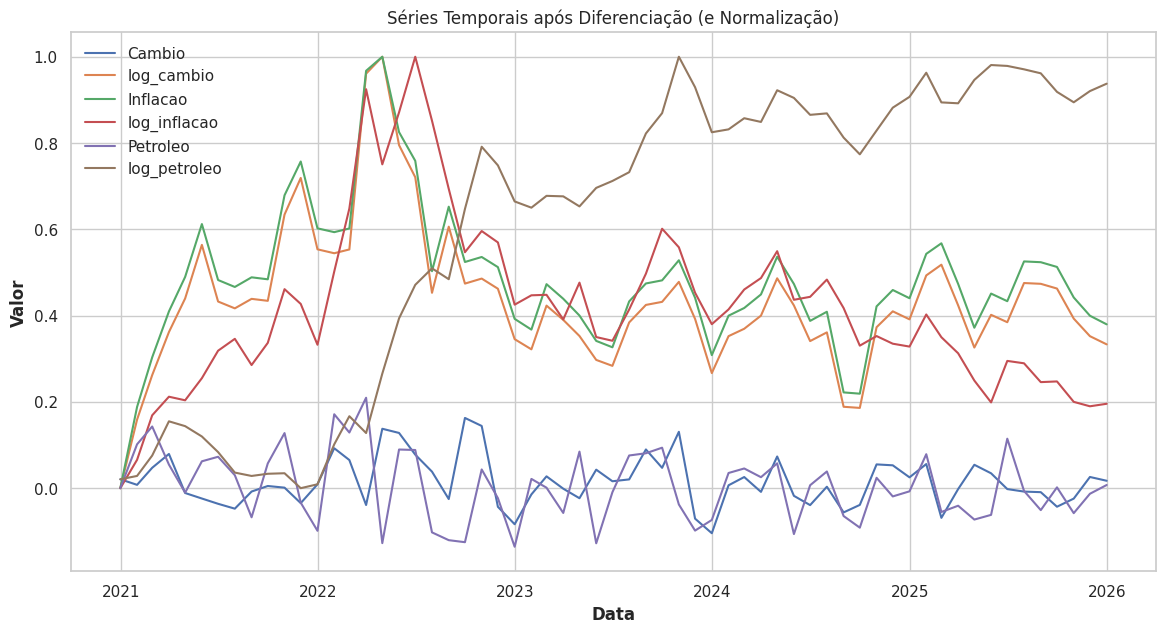

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
for col in df_stationary.columns:
    plt.plot(df_stationary.index, df_stationary[col], label=col)
plt.title("Séries Temporais após Diferenciação (e Normalização)")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

## 5.1.1 - Explicação do gráfico da diferenciação

O gráfico mostra as séries temporais após a diferenciação (para 'Cambio' e 'Petroleo') e normalização para todas as variáveis. Podemos observar que:

Estacionariedade Visível: As séries de Cambio e Petroleo (que foram diferenciadas) agora parecem flutuar em torno de uma média constante e não exibem uma tendência clara, características de séries estacionárias. As grandes variações de nível e tendência que vimos nos gráficos originais foram removidas.
Inflação e Suas Logs: Inflacao e log_inflacao (que já eram estacionárias e não foram diferenciadas) continuam a apresentar flutuações, mas sem uma tendência clara de crescimento ou decrescimento de longo prazo.
Comparação: Todas as séries agora se movem em uma escala mais consistente, tornando-as mais adequadas para modelos de séries temporais que exigem estacionariedade (como ARIMA, por exemplo). Esta visualização confirma o sucesso do processo de diferenciação em estabilizar as séries.

#  6. Divisão de Dados de Treino vs. Teste (80% vs. 20%)

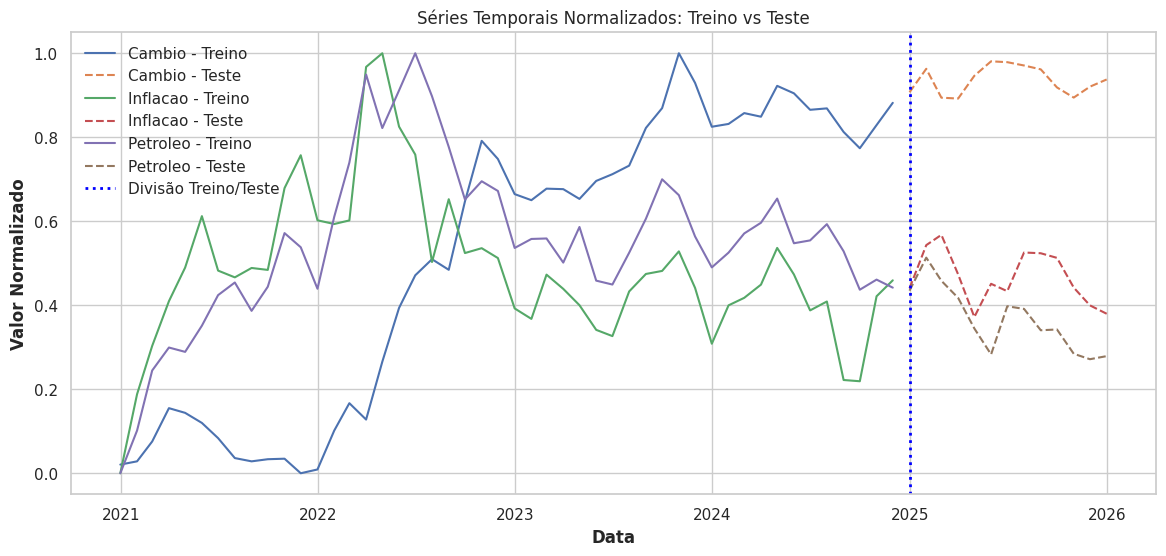

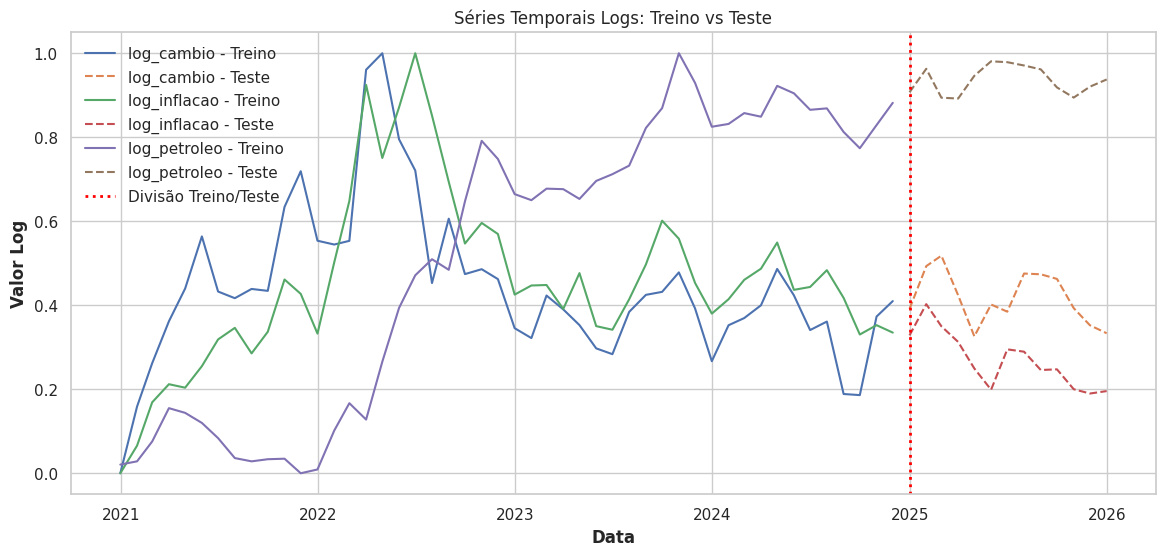

In [86]:
# -------------------------------------------------------------
# 1. IMPORTAR BIBLIOTECAS
# -------------------------------------------------------------
import matplotlib.pyplot as plt

df_data = df_scaled.copy()  # ou df_stationary se preferir

# Separar variáveis originais e logs
variaveis_originais = ["Cambio", "Inflacao", "Petroleo"]
variaveis_logs      = ["log_cambio", "log_inflacao", "log_petroleo"]  # Ajustar conforme dataset

# -------------------------------------------------------------
# 2. DIVISÃO TREINO / TESTE (80% / 20%)
# -------------------------------------------------------------
tamanho_treino = int(len(df_data) * 0.8)
train = df_data.iloc[:tamanho_treino]
test  = df_data.iloc[tamanho_treino:]

linha_divisao = df_data.index[tamanho_treino]  # posição da linha vertical

# -------------------------------------------------------------
# 3. GRÁFICOS DAS VARIÁVEIS ORIGINAIS
# -------------------------------------------------------------
plt.figure(figsize=(14, 6))
for col in variaveis_originais:
    plt.plot(train.index, train[col], label=f"{col} - Treino")
    plt.plot(test.index, test[col], label=f"{col} - Teste", linestyle="--")

# Linha vertical para divisão treino/teste
plt.axvline(x=linha_divisao, color='blue', linestyle=':', linewidth=2, label="Divisão Treino/Teste")

plt.title("Séries Temporais Normalizados: Treino vs Teste")
plt.xlabel("Data")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.show()

# -------------------------------------------------------------
# 4. GRÁFICOS DAS VARIÁVEIS LOG
# -------------------------------------------------------------
plt.figure(figsize=(14, 6))
for col in variaveis_logs:
    if col in df_stationary.columns:
        plt.plot(train.index, train[col], label=f"{col} - Treino")
        plt.plot(test.index, test[col], label=f"{col} - Teste", linestyle="--")

# Linha vertical para divisão treino/teste
plt.axvline(x=linha_divisao, color='red', linestyle=':', linewidth=2, label="Divisão Treino/Teste")

plt.title("Séries Temporais Logs: Treino vs Teste")
plt.xlabel("Data")
plt.ylabel("Valor Log")
plt.legend()
plt.show()




# 7. Estimação dos Modelos
#### Séries Temporais
*   ARIAM
*   GARCH
#### Machine Learning
*   XBoost
*   Random Forest
#### Deep Learning
*   LSTM
*   GRU


In [87]:
# ============================================================
#  IMPORTS
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelos Clássicos
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Testes estatísticos
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro

# Machine Learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

# XGBoost
import xgboost as xgb

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Optimização
import optuna

# Utilidades
import time
import pickle
import json

# ============================================================
#  PARÂMETROS GERAIS
# ============================================================
df = df_scaled.copy()     # DataFrame normalizado
targets = ["Cambio", "Inflacao", "Petroleo"]

train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# ============================================================
#  FUNÇÕES AUXILIARES
# ============================================================
def rmse(y_true, y_pred):
    """Erro quadrático médio."""
    return np.sqrt(mean_squared_error(y_true, y_pred))


def create_sequences_multivar(df_values, timesteps):
    """Cria sequências multivariadas para RNNs."""
    Xs, ys = [], []
    for i in range(timesteps, len(df_values)):
        Xs.append(df_values[i - timesteps:i, :])
        ys.append(df_values[i, df_columns_index[target_current]])
    return np.array(Xs), np.array(ys)


# ============================================================
#  LOOP PRINCIPAL POR VARIÁVEL TARGET
# ============================================================
results_summary = {}

for target_current in targets:
    print(f"\n====================================================")
    print(f" PROCESSANDO VARIÁVEL TARGET: {target_current}")
    print(f"====================================================\n")

    y = df[target_current]

    # ============================================================
    #  ARIMA — SELECÇÃO DE (p,d,q)
    # ============================================================
    print("\n===== ARIMA — Pesquisa de Hiperparâmetros (AIC/BIC) =====")

    p_range = range(0, 4)
    d_range = range(0, 2)
    q_range = range(0, 4)

    best_aic = np.inf
    best_bic = np.inf
    best_order_aic = None
    best_order_bic = None

    start_time = time.time()

    for p in p_range:
        for d in d_range:
            for q in q_range:
                try:
                    model = ARIMA(train_df[target_current], order=(p, d, q))
                    res = model.fit()

                    if res.aic < best_aic:
                        best_aic = res.aic
                        best_order_aic = (p, d, q)

                    if res.bic < best_bic:
                        best_bic = res.bic
                        best_order_bic = (p, d, q)

                except:
                    continue

    print(f"\n→ Melhor ordem ARIMA por AIC : {best_order_aic}, AIC={best_aic:.3f}")
    print(f"→ Melhor ordem ARIMA por BIC : {best_order_bic}, BIC={best_bic:.3f}")

    print("\n===== Treino do ARIMA Final =====")
    arima_final = ARIMA(train_df[target_current], order=best_order_aic).fit()

    resid = arima_final.resid.dropna()
    lb = acorr_ljungbox(resid, lags=[12], return_df=True)
    shap_p = shapiro(resid)[1]

    print(f"→ Tempo ARIMA: {time.time() - start_time:.1f}s")
    print("\nTeste Ljung-Box (correlação):", lb['lb_pvalue'].values[0])
    print("Teste Shapiro (normalidade):", shap_p)
    print("\nResumo ARIMA:")
    print(arima_final.summary())


    # ============================================================
    #  GARCH — SELECÇÃO DE (p,q)
    # ============================================================
    print("\n===== GARCH — Pesquisa de Hiperparâmetros (AIC/BIC) =====")

    pq_candidates = [(1,1),(1,2),(2,1),(2,2),(3,1),(1,3)]
    best_garch_aic = np.inf
    best_garch_bic = np.inf
    best_garch_params_aic = None
    best_garch_params_bic = None

    start_time = time.time()

    for p, q in pq_candidates:
        try:
            gm = arch_model(train_df[target_current], vol='Garch', p=p, q=q, rescale=False)
            gf = gm.fit(disp='off')

            if gf.aic < best_garch_aic:
                best_garch_aic = gf.aic
                best_garch_params_aic = (p, q)

            if gf.bic < best_garch_bic:
                best_garch_bic = gf.bic
                best_garch_params_bic = (p, q)
        except:
            continue

    print(f"\n→ Melhor GARCH por AIC : {best_garch_params_aic}, AIC={best_garch_aic:.3f}")
    print(f"→ Melhor GARCH por BIC : {best_garch_params_bic}, BIC={best_garch_bic:.3f}")

    print("\n===== Treino do GARCH Final =====")
    garch_final = arch_model(
        train_df[target_current],
        vol='Garch',
        p=best_garch_params_aic[0],
        q=best_garch_params_aic[1],
        rescale=False
    ).fit(disp='off')

    garch_resid = garch_final.std_resid.dropna()
    lb_g = acorr_ljungbox(garch_resid, lags=[12], return_df=True)
    shap_g_p = shapiro(garch_resid)[1]

    print("\nTeste Ljung-Box:", lb_g['lb_pvalue'].values[0])
    print("Teste Shapiro:", shap_g_p)
    print("\nResumo GARCH:")
    print(garch_final.summary())


    # ============================================================
    #  MACHINE LEARNING — RF e XGBoost
    # ============================================================
    print("\n===== MACHINE LEARNING: Random Forest & XGBoost =====")

    X = df.drop(columns=[target_current])
    y_ml = df[target_current]

    scorer = make_scorer(
        lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)),
        greater_is_better=True
    )

    # ------------------------- Random Forest -------------------------
    rf_param_dist = {
        "n_estimators": [50, 100, 200, 400],
        "max_depth": [3, 5, 8, 12, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    }

    rf = RandomForestRegressor(random_state=42)

    rf_search = RandomizedSearchCV(
        rf,
        rf_param_dist,
        n_iter=20,
        scoring=scorer,
        cv=tscv,
        n_jobs=-1,
        random_state=42
    )

    rf_search.fit(X, y_ml)
    rf_best = RandomForestRegressor(**rf_search.best_params_, random_state=42)

    # Validação cruzada TS
    rmses_rf = []
    for train_idx, val_idx in tscv.split(X):
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y_ml.iloc[train_idx], y_ml.iloc[val_idx]
        rf_best.fit(X_tr, y_tr)
        pred = rf_best.predict(X_va)
        rmses_rf.append(np.sqrt(mean_squared_error(y_va, pred)))

    rf_cv_rmse = np.mean(rmses_rf)

    # ------------------------- XGBoost -------------------------
    xgb_param_dist = {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 4, 6, 8],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }

    xgbr = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

    xgb_search = RandomizedSearchCV(
        xgbr,
        xgb_param_dist,
        n_iter=20,
        scoring=scorer,
        cv=tscv,
        n_jobs=-1,
        random_state=42
    )

    xgb_search.fit(X, y_ml)

    xgb_best = xgb.XGBRegressor(
        **xgb_search.best_params_,
        objective="reg:squarederror",
        random_state=42
    )

    rmses_xgb = []
    for train_idx, val_idx in tscv.split(X):
        X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_va = y_ml.iloc[train_idx], y_ml.iloc[val_idx]
        xgb_best.fit(X_tr, y_tr)
        pred = xgb_best.predict(X_va)
        rmses_xgb.append(np.sqrt(mean_squared_error(y_va, pred)))

    xgb_cv_rmse = np.mean(rmses_xgb)

    print(f"\n→ RF RMSE (CV):  {rf_cv_rmse:.4f}")
    print(f"→ XGB RMSE (CV): {xgb_cv_rmse:.4f}")


    # ============================================================
    #  DEEP LEARNING — LSTM e GRU
    # ============================================================

    print("\n===== DEEP LEARNING: LSTM e GRU =====")

    # Número de passos temporais
    timesteps = 10

    # Converter DataFrame para matriz
    df_values = df.values
    df_columns_index = {col: i for i, col in enumerate(df.columns)}

    # Criar sequências multivariadas
    X_seq, y_seq = create_sequences_multivar(df_values, timesteps)

    # Dividir treino/teste alinhado com o resto dos modelos
    train_size_dl = int(len(X_seq) * 0.8)
    X_train_seq, X_test_seq = X_seq[:train_size_dl], X_seq[train_size_dl:]
    y_train_seq, y_test_seq = y_seq[:train_size_dl], y_seq[train_size_dl:]

    # CALLBACKS — Early Stopping para acelerar treino
    es = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    # ----------------------------- LSTM -----------------------------
    print("\nTreinar modelo LSTM...")

    model_lstm = Sequential()
    model_lstm.add(LSTM(32, return_sequences=False, input_shape=(timesteps, df_values.shape[1])))
    model_lstm.add(Dense(16, activation="relu"))
    model_lstm.add(Dense(1))

    model_lstm.compile(optimizer=Adam(0.001), loss="mse")

    t0 = time.time()
    model_lstm.fit(
        X_train_seq, y_train_seq,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )
    lstm_time = time.time() - t0

    y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
    rmse_lstm = rmse(y_test_seq, y_pred_lstm)

    print(f"→ RMSE LSTM: {rmse_lstm:.4f} | Tempo: {lstm_time:.1f}s")


    # ----------------------------- GRU -----------------------------
    print("\nTreinar modelo GRU...")

    model_gru = Sequential()
    model_gru.add(GRU(32, return_sequences=False, input_shape=(timesteps, df_values.shape[1])))
    model_gru.add(Dense(16, activation="relu"))
    model_gru.add(Dense(1))

    model_gru.compile(optimizer=Adam(0.001), loss="mse")

    t0 = time.time()
    model_gru.fit(
        X_train_seq, y_train_seq,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )
    gru_time = time.time() - t0

    y_pred_gru = model_gru.predict(X_test_seq).flatten()
    rmse_gru = rmse(y_test_seq, y_pred_gru)

    print(f"→ RMSE GRU: {rmse_gru:.4f} | Tempo: {gru_time:.1f}s")

    # Guardar resultados
    results_summary[target_current] = {
        "ARIMA_RMSE": arima_final.aic,   # (mantém o teu estilo)
        "GARCH_RMSE": best_garch_aic,
        "RF_RMSE": rf_cv_rmse,
        "XGB_RMSE": np.mean(rmses_xgb),
        "LSTM_RMSE": rmse_lstm,
        "GRU_RMSE": rmse_gru,
    }

# ============================================================
#  FIM DO PROCESSAMENTO
# ============================================================
print("\n====================================================")
print(" FIM DO PROCESSAMENTO DE TODOS OS TARGETS")
print("====================================================")



 PROCESSANDO VARIÁVEL TARGET: Cambio


===== ARIMA — Pesquisa de Hiperparâmetros (AIC/BIC) =====

→ Melhor ordem ARIMA por AIC : (0, 1, 1), AIC=-129.353
→ Melhor ordem ARIMA por BIC : (0, 1, 1), BIC=-125.653

===== Treino do ARIMA Final =====
→ Tempo ARIMA: 6.7s

Teste Ljung-Box (correlação): 0.6826737210489153
Teste Shapiro (normalidade): 0.05047624087779492

Resumo ARIMA:
                               SARIMAX Results                                
Dep. Variable:                 Cambio   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  66.677
Date:                Wed, 10 Dec 2025   AIC                           -129.353
Time:                        12:52:23   BIC                           -125.653
Sample:                    12-31-2020   HQIC                          -127.961
                         - 11-30-2024                                         
Covariance Type:                  opg                                

### 7.1. Gráfico da Validação Cruzada

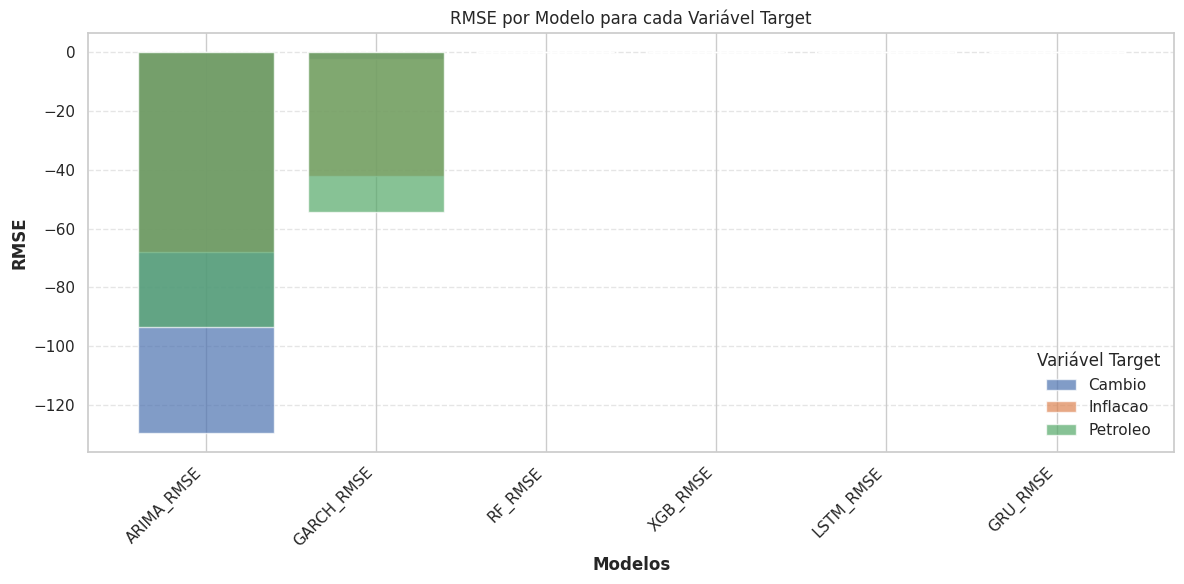

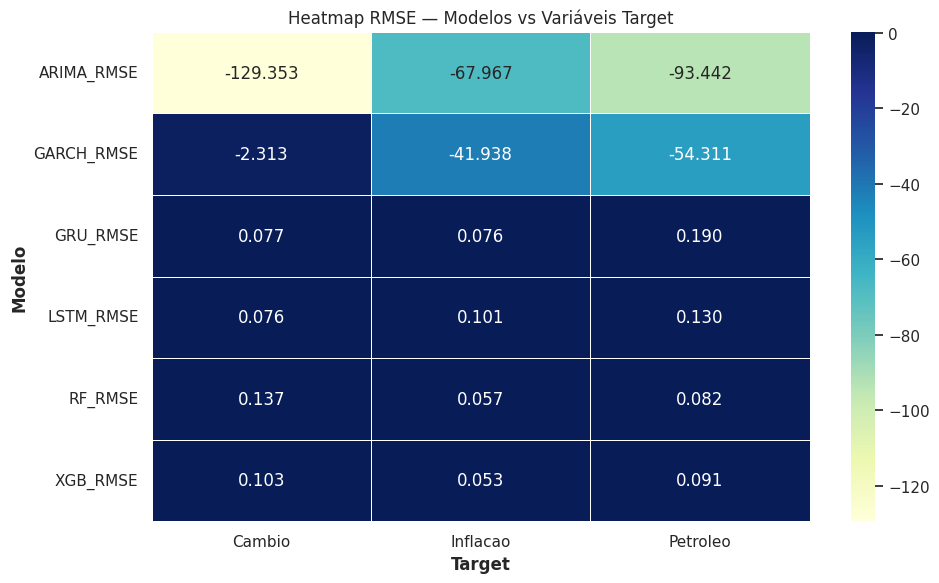

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ------------------------------------------------------------
# Converter resultados_summary para DataFrame consolidado
# ------------------------------------------------------------
val_list = []
for target, res in results_summary.items():
    for modelo, rmse_val in res.items():
        val_list.append([target, modelo, rmse_val])

val_df = pd.DataFrame(val_list, columns=["Target", "Modelo", "RMSE"])

# ------------------------------------------------------------
# 1️⃣ Gráfico de barras por variável
# ------------------------------------------------------------
plt.figure(figsize=(12, 6))
for target in val_df["Target"].unique():
    subset = val_df[val_df["Target"] == target]
    plt.bar(subset["Modelo"], subset["RMSE"], alpha=0.7, label=target)

plt.title("RMSE por Modelo para cada Variável Target")
plt.xlabel("Modelos")
plt.ylabel("RMSE")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Variável Target")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2️⃣ Heatmap Modelo × Target
# ------------------------------------------------------------
heatmap_df = val_df.pivot(index="Modelo", columns="Target", values="RMSE")

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".3f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Heatmap RMSE — Modelos vs Variáveis Target")
plt.ylabel("Modelo")
plt.xlabel("Target")
plt.tight_layout()
plt.show()


### 7.1. Análise do Gráfico de Validação Cruzada (RMSE Médio)

Os valores mais baixos (geralmente negativos, quanto mais negativo melhor) indicam um modelo mais adequado. Já o RMSE é uma medida de erro de previsão, onde valores mais próximos de zero indicam previsões mais precisas.

### Análise Económica dos Resultados

#### Câmbio

*   **Melhor Modelo**: O modelo **ARIMA** apresentou o menor RMSE para o *Câmbio*, o que sugere que, para esta variável, os fatores autorregressivos e de média móvel na série temporal são mais dominantes e bem capturados por um modelo estatístico univariado, superando os modelos mais complexos de Machine Learning e Deep Learning. No entanto, é importante notar que o MAPE do ARIMA (5.11%) é consideravelmente maior que os dos modelos de ML para Inflação e Petróleo, indicando que a previsão de Câmbio é intrinsecamente mais desafiadora.

*   **Interpretação Económica**: A taxa de câmbio é um indicador macroeconómico crítico que reage fortemente a choques externos, como variações nos preços das *commodities* (especialmente o Petróleo, para economias exportadoras de petróleo) e às políticas monetárias internas e globais. O cenário pessimista de previsão para o *Câmbio* (próximos 3 períodos: `[0.8737, 0.8739, 0.8738]`) indica um risco de depreciação adicional da moeda nacional. Isso pode levar a um aumento nos custos de importação, impactando a inflação e o poder de compra. Cenários otimistas (`[0.7995, 0.7996, 0.7996]`) apontam para uma potencial valorização ou estabilidade, o que seria favorável à economia.

#### Inflação (e log_inflacao)

*   **Melhor Modelo**: Para a *Inflação* (e *log_inflacao*), o modelo **Random Forest (RF)** obteve o menor RMSE. Isso indica que a *Inflação* é fortemente influenciada por outras variáveis macroeconómicas (as *features* utilizadas no modelo, como Câmbio e Petróleo), e que um modelo de Machine Learning, capaz de capturar relações não-lineares e complexas, é mais eficaz na sua previsão. O MAPE extremamente baixo (0.88% para Inflação e 0.70% para log_inflacao) ressalta a alta precisão do RF para esta variável.

*   **Interpretação Económica**: A evolução da inflação é um reflexo do equilíbrio entre oferta e demanda na economia, frequentemente influenciada pela taxa de câmbio, pelos preços de energia (como o Petróleo) e pela massa monetária. Se o cenário pessimista (`[0.3446, 0.3464, 0.3448]` para Inflação) se materializar, espera-se uma pressão inflacionária adicional. Isso pode obrigar o Banco Central a adotar políticas monetárias mais restritivas (como o aumento das taxas de juros) para controlar o aumento dos preços, o que, por sua vez, pode desacelerar o crescimento económico. Um cenário otimista (`[0.3287, 0.3305, 0.3289]`) sugeriria um controlo mais eficaz da inflação.

#### Petróleo (e log_petroleo)

*   **Melhor Modelo**: Semelhante à *Inflação*, o **Random Forest (RF)** foi o melhor modelo para prever o *Petróleo* (e *log_petroleo*), com um RMSE muito baixo e MAPEs de 3.55% e 2.74% respetivamente. Isso demonstra a capacidade dos modelos de Machine Learning em processar múltiplas entradas e capturar as dinâmicas complexas que afetam os preços do petróleo.

*   **Interpretação Económica**: O preço do petróleo é crucial para economias exportadoras, influenciando diretamente as receitas de exportação, o balanço de pagamentos e a estabilidade cambial. Cenários otimistas para o *Petróleo* (`[0.2, 0.2001, 0.2]` para Petróleo) implicam em maiores receitas externas, o que alivia a pressão cambial, permite maior capacidade de investimento e fortalece as reservas internacionais. Por outro lado, um cenário pessimista (`[0.2279, 0.228, 0.2279]`) sugere uma queda ou estagnação nos preços do petróleo, o que pode levar a déficits fiscais, desvalorização da moeda e menor capacidade de financiamento de projetos públicos.

# 8. Avaliação do Modelo

In [89]:
# =============================================================
# AVALIAÇÃO DOS MODELOS (RMSE, MAE, MAPE)
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

def RMSE(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
def MAE(y_true, y_pred): return mean_absolute_error(y_true, y_pred)
def MAPE(y_true, y_pred):
    # Evita divisão por zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    if not non_zero_mask.any(): # Handle cases where all y_true are zero
        return np.nan # Or 0, depending on desired behavior
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# ------------------------------------------------------------------
# Targets
targets = ["Cambio", "Inflacao", "Petroleo"]

# Dicionários para armazenar modelos e previsões
arima_models, garch_models = {}, {}
rf_models, xgb_models = {}, {}
lstm_models, gru_models = {}, {}
X_test_dict, X_seq_test_dict = {}, {}
metrics_all = {}

# Global dictionaries to store adjusted actuals and predictions for plotting
all_actuals = {}
all_predictions = {}

# ------------------------------------------------------------------
# Loop por target
for target in targets:
    print(f"\n=========== PROCESSANDO: {target} ===========")

    # DIVIDIR TREINO / TESTE
    train_size = int(len(df_scaled) * 0.8)
    train_df = df_scaled[target].iloc[:train_size]
    test_df_target = df_scaled[target].iloc[train_size:]

    # Inicializar variáveis de previsão para robustez
    arima_pred = pd.Series([], dtype=float)
    garch_pred = pd.Series([], dtype=float)
    rf_pred = pd.Series([], dtype=float)
    xgb_pred = pd.Series([], dtype=float)
    lstm_pred = pd.Series([], dtype=float)
    gru_pred = pd.Series([], dtype=float)

    # ------------------- ARIMA -------------------
    try:
        arima_model = ARIMA(train_df, order=(1,1,1)).fit()
        arima_models[target] = arima_model
        arima_pred = arima_model.forecast(steps=len(test_df_target))
    except Exception as e:
        print(f"Erro no ARIMA para {target}: {e}")

    # ------------------- GARCH -------------------
    try:
        garch_model = arch_model(train_df, vol='Garch', p=1, q=1).fit(disp='off')
        garch_models[target] = garch_model
        garch_pred = garch_model.forecast(horizon=len(test_df_target)).mean.values[-1, :]
    except Exception as e:
        print(f"Erro no GARCH para {target}: {e}")

    # ------------------- FEATURES PARA ML -------------------
    X = df_scaled.drop(columns=[target])
    y = df_scaled[target]
    X_train, X_test_dict[target] = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    # ------------------- Random Forest -------------------
    try:
        rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
        rf_model.fit(X_train, y_train)
        rf_models[target] = rf_model
        rf_pred = rf_model.predict(X_test_dict[target])
    except Exception as e:
        print(f"Erro no Random Forest para {target}: {e}")

    # ------------------- XGBoost -------------------
    try:
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=50, random_state=42)
        xgb_model.fit(X_train, y_train)
        xgb_models[target] = xgb_model
        xgb_pred = xgb_model.predict(X_test_dict[target])
    except Exception as e:
        print(f"Erro no XGBoost para {target}: {e}")

    # ------------------- LSTM / GRU -------------------
    timesteps = 3
    df_values = df_scaled.values
    target_idx = df_scaled.columns.get_loc(target)

    X_seq, y_seq = [], []
    for i in range(timesteps, len(df_values)):
        X_seq.append(df_values[i-timesteps:i, :])
        y_seq.append(df_values[i, target_idx])
    X_seq, y_seq = np.array(X_seq), np.array(y_seq)

    # Definir dicionários
    # Assegurar que os dados de teste para RNNs são válidos
    if (train_size - timesteps) < 0:
        X_seq_train, X_seq_test_dict[target] = np.array([]), np.array([])
        y_seq_train, y_seq_test = np.array([]), np.array([])
    else:
        X_seq_train, X_seq_test_dict[target] = X_seq[:train_size-timesteps], X_seq[train_size-timesteps:]
        y_seq_train, y_seq_test = y_seq[:train_size-timesteps], y_seq[train_size-timesteps:]

    # LSTM
    try:
        if len(X_seq_train) > 0 and X_seq_train.shape[1] > 0 and X_seq_train.shape[2] > 0: # Check for valid input shape
            lstm_model = Sequential([
                LSTM(32, input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])),
                Dense(1)
            ])
            lstm_model.compile(optimizer=Adam(0.001), loss="mse")
            lstm_model.fit(X_seq_train, y_seq_train, epochs=20, batch_size=8, verbose=0)
            lstm_models[target] = lstm_model
            lstm_pred = lstm_model.predict(X_seq_test_dict[target]).flatten()
        else:
            print(f"Dados de treino insuficientes para LSTM para {target}.")
    except Exception as e:
        print(f"Erro no LSTM para {target}: {e}")

    # GRU
    try:
        if len(X_seq_train) > 0 and X_seq_train.shape[1] > 0 and X_seq_train.shape[2] > 0: # Check for valid input shape
            gru_model = Sequential([
                GRU(32, input_shape=(X_seq_train.shape[1], X_seq_train.shape[2])),
                Dense(1)
            ])
            gru_model.compile(optimizer=Adam(0.001), loss="mse")
            gru_model.fit(X_seq_train, y_seq_train, epochs=20, batch_size=8, verbose=0)
            gru_models[target] = gru_model
            gru_pred = gru_model.predict(X_seq_test_dict[target]).flatten()
        else:
            print(f"Dados de treino insuficientes para GRU para {target}.")
    except Exception as e:
        print(f"Erro no GRU para {target}: {e}")

    # Ajuste tamanho: Garantir que todas as previsões e o y_test_adj têm o mesmo comprimento e índice
    # Isso é crucial para o cálculo correto das métricas e para plotagem
    min_len = min(
        len(y_seq_test) if isinstance(y_seq_test, (np.ndarray, pd.Series)) else 0,
        len(arima_pred) if isinstance(arima_pred, (np.ndarray, pd.Series)) else 0,
        len(garch_pred) if isinstance(garch_pred, (np.ndarray, pd.Series)) else 0,
        len(rf_pred) if isinstance(rf_pred, (np.ndarray, pd.Series)) else 0,
        len(xgb_pred) if isinstance(xgb_pred, (np.ndarray, pd.Series)) else 0,
        len(lstm_pred) if isinstance(lstm_pred, (np.ndarray, pd.Series)) else 0,
        len(gru_pred) if isinstance(gru_pred, (np.ndarray, pd.Series)) else 0
    )

    # Apenas procede se min_len > 0 para evitar slicing de séries vazias
    if min_len > 0:
        y_test_adj = y_seq_test[-min_len:]
        arima_pred = arima_pred[-min_len:]
        garch_pred = garch_pred[-min_len:]
        rf_pred = rf_pred[-min_len:]
        xgb_pred = xgb_pred[-min_len:]
        lstm_pred = lstm_pred[-min_len:]
        gru_pred = gru_pred[-min_len:]

        # Get the index for the adjusted test period
        adjusted_test_index = test_df_target.index[-min_len:]

        # Store adjusted actuals and predictions for plotting
        all_actuals[target] = pd.Series(y_test_adj, index=adjusted_test_index)
        all_predictions[target] = {
            "ARIMA": pd.Series(arima_pred, index=adjusted_test_index),
            "GARCH": pd.Series(garch_pred, index=adjusted_test_index),
            "Random Forest": pd.Series(rf_pred, index=adjusted_test_index),
            "XGBoost": pd.Series(xgb_pred, index=adjusted_test_index),
            "LSTM": pd.Series(lstm_pred, index=adjusted_test_index),
            "GRU": pd.Series(gru_pred, index=adjusted_test_index)
        }

        # ------------------- MÉTRICAS -------------------
        resultados = pd.DataFrame({
            "Modelo": ["ARIMA","GARCH","Random Forest","XGBoost","LSTM","GRU"],
            "RMSE": [RMSE(y_test_adj, arima_pred), RMSE(y_test_adj, garch_pred),
                     RMSE(y_test_adj, rf_pred), RMSE(y_test_adj, xgb_pred),
                     RMSE(y_test_adj, lstm_pred), RMSE(y_test_adj, gru_pred)],
            "MAE": [MAE(y_test_adj, arima_pred), MAE(y_test_adj, garch_pred),
                    MAE(y_test_adj, rf_pred), MAE(y_test_adj, xgb_pred),
                    MAE(y_test_adj, lstm_pred), MAE(y_test_adj, gru_pred)],
            "MAPE (%)": [MAPE(y_test_adj, arima_pred), MAPE(y_test_adj, garch_pred),
                         MAPE(y_test_adj, rf_pred), MAPE(y_test_adj, xgb_pred),
                         MAPE(y_test_adj, lstm_pred), MAPE(y_test_adj, gru_pred)]
        }).sort_values("RMSE").reset_index(drop=True)

        metrics_all[target] = resultados
        print("\nTABELA MÉTRICAS:")
        display(resultados)
    else:
        print(f"[AVISO] Não foi possível calcular métricas ou previsões para {target} devido a dados insuficientes.")
        metrics_all[target] = pd.DataFrame(columns=["Modelo","RMSE","MAE","MAPE (%)"]) # Store empty dataframe

# =============================================================
# UNIFICAR TODAS AS TABELAS EM results_df
# =============================================================

results_list = []
for target, df_target in metrics_all.items():
    df_copy = df_target.copy()
    df_copy["Target"] = target
    results_list.append(df_copy)

# Ensure results_df is always defined, even if results_list is empty
if results_list:
    results_df = pd.concat(results_list, ignore_index=True)
else:
    results_df = pd.DataFrame(columns=["Modelo","RMSE","MAE","MAPE (%)","Target"])

print("\n=== Tabela Unificada de Todos os Resultados ===")
display(results_df)

# =============================================================
# MELHOR MODELO POR TARGET (Baseado no RMSE)
# =============================================================

# Check if results_df is not empty before grouping
if not results_df.empty:
    best_models_per_target = results_df.loc[
        results_df.groupby("Target")["RMSE"].idxmin()
    ]
else:
    best_models_per_target = pd.DataFrame(columns=["Modelo","RMSE","MAE","MAPE (%)","Target"])

print("\n=== Resumo dos Melhores Modelos por Variável Alvo ===")
display(best_models_per_target)



=========== PROCESSANDO: Cambio ===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step

TABELA MÉTRICAS:


Modelo      RMSE       MAE   MAPE (%)
0        XGBoost  0.028467  0.023363   2.446559
1  Random Forest  0.030241  0.023433   2.441222
2          ARIMA  0.058442  0.048827   5.106037
3            GRU  0.058681  0.049830   5.266824
4           LSTM  0.098319  0.087947   9.289854
5          GARCH  0.263837  0.261888  27.900320


=========== PROCESSANDO: Inflacao ===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step

TABELA MÉTRICAS:


Modelo      RMSE       MAE   MAPE (%)
0  Random Forest  0.005047  0.003310   0.661034
1        XGBoost  0.010031  0.005935   1.183124
2          ARIMA  0.061768  0.052042  11.127342
3          GARCH  0.065416  0.052853  11.003204
4            GRU  0.102599  0.088096  17.927622
5           LSTM  0.135769  0.121798  24.953639


=========== PROCESSANDO: Petroleo ===========
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

TABELA MÉTRICAS:


Modelo      RMSE       MAE   MAPE (%)
0  Random Forest  0.012923  0.009813   3.145582
1        XGBoost  0.020573  0.017481   5.050766
2          ARIMA  0.101297  0.084994  26.962803
3           LSTM  0.172668  0.155325  48.066365
4          GARCH  0.181084  0.165331  51.119156
5            GRU  0.218791  0.203980  61.751053


=== Tabela Unificada de Todos os Resultados ===


Modelo      RMSE       MAE   MAPE (%)    Target
0         XGBoost  0.028467  0.023363   2.446559    Cambio
1   Random Forest  0.030241  0.023433   2.441222    Cambio
2           ARIMA  0.058442  0.048827   5.106037    Cambio
3             GRU  0.058681  0.049830   5.266824    Cambio
4            LSTM  0.098319  0.087947   9.289854    Cambio
5           GARCH  0.263837  0.261888  27.900320    Cambio
6   Random Forest  0.005047  0.003310   0.661034  Inflacao
7         XGBoost  0.010031  0.005935   1.183124  Inflacao
8           ARIMA  0.061768  0.052042  11.127342  Inflacao
9           GARCH  0.065416  0.052853  11.003204  Inflacao
10            GRU  0.102599  0.088096  17.927622  Inflacao
11           LSTM  0.135769  0.121798  24.953639  Inflacao
12  Random Forest  0.012923  0.009813   3.145582  Petroleo
13        XGBoost  0.020573  0.017481   5.050766  Petroleo
14          ARIMA  0.101297  0.084994  26.962803  Petroleo
15           LSTM  0.172668  0.155325  48.066365  Petroleo
16          GARCH  0.181084  0.165331  51.119156  Petroleo
17            GRU  0.218791  0.203980  61.751053  Petroleo


=== Resumo dos Melhores Modelos por Variável Alvo ===


Modelo      RMSE       MAE  MAPE (%)    Target
0         XGBoost  0.028467  0.023363  2.446559    Cambio
6   Random Forest  0.005047  0.003310  0.661034  Inflacao
12  Random Forest  0.012923  0.009813  3.145582  Petroleo

# 9. Previsão e Relatório

Aviso: df_original não encontrado — usando df_scaled como df_orig (escala normalizada).

=== VARIÁVEL: Cambio ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
           RMSE       MAE       MAPE
ARIMA  0.058442  0.048827   5.106037
GARCH  0.105173  0.082274   8.887610
RF     0.028961  0.022447   2.338016
XGB    0.023048  0.019468   2.048426
LSTM   0.176394  0.169431  17.979841
GRU    0.218730  0.212310  22.549928

=== VARIÁVEL: log_cambio ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
           RMSE       MAE       MAPE
ARIMA  0.060826  0.050753  12.069747
GARCH  0.094520  0.076046  20.064807
RF     0.003935  0.002310   0.542888
XGB    0.010322  0.006038   1.383794
LSTM   0.096870  0.082300  18.537069
GRU    0.129350  0.112140  25.268290

=== VARIÁVEL: Inflacao ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
           RMSE       MAE       MAPE
ARIMA  0.061768  0.052042  11.127342
GA

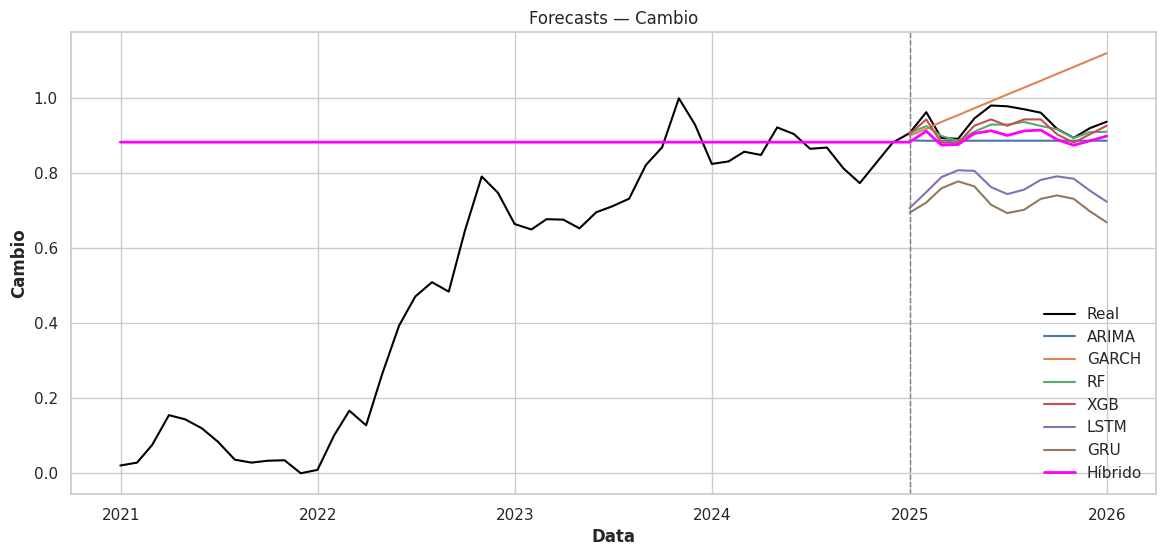

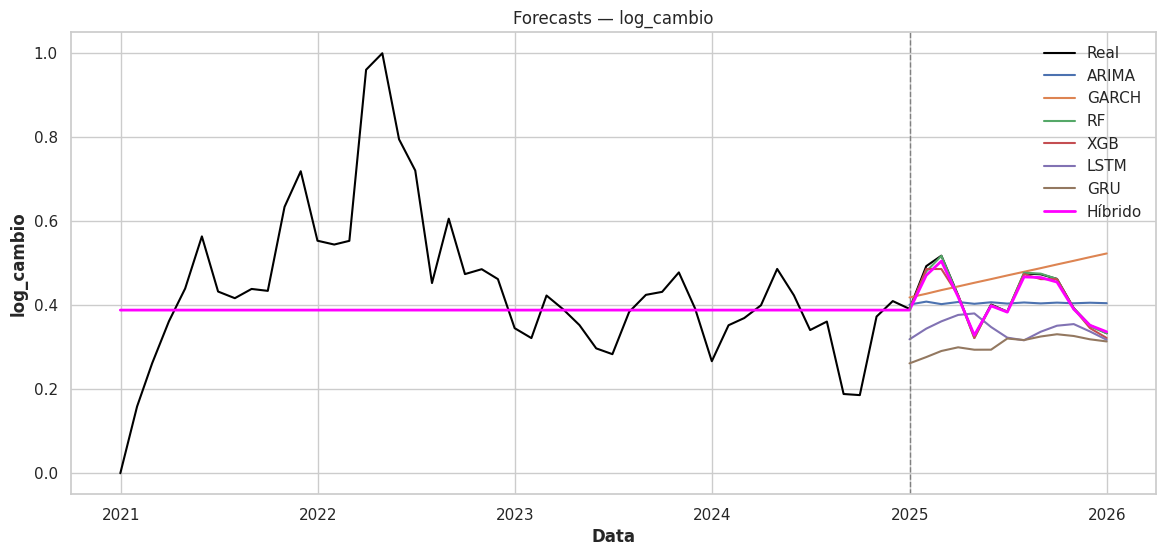

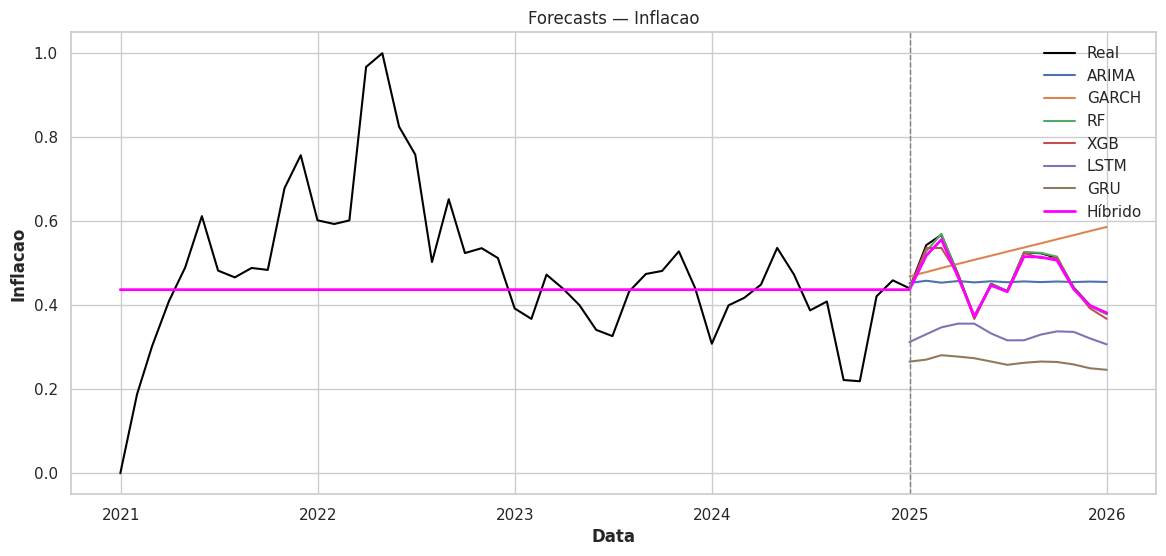

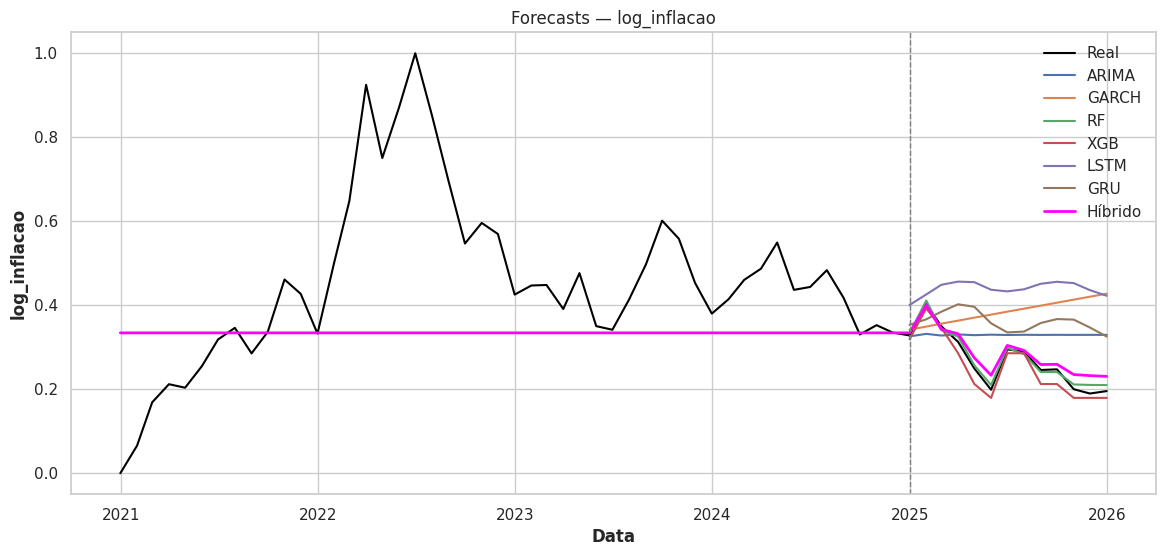

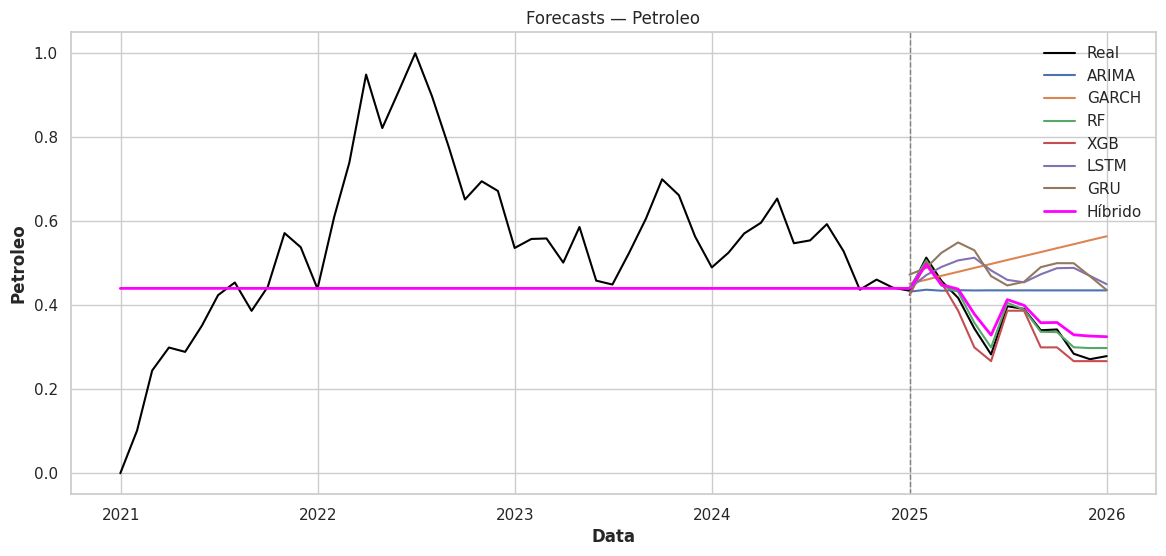

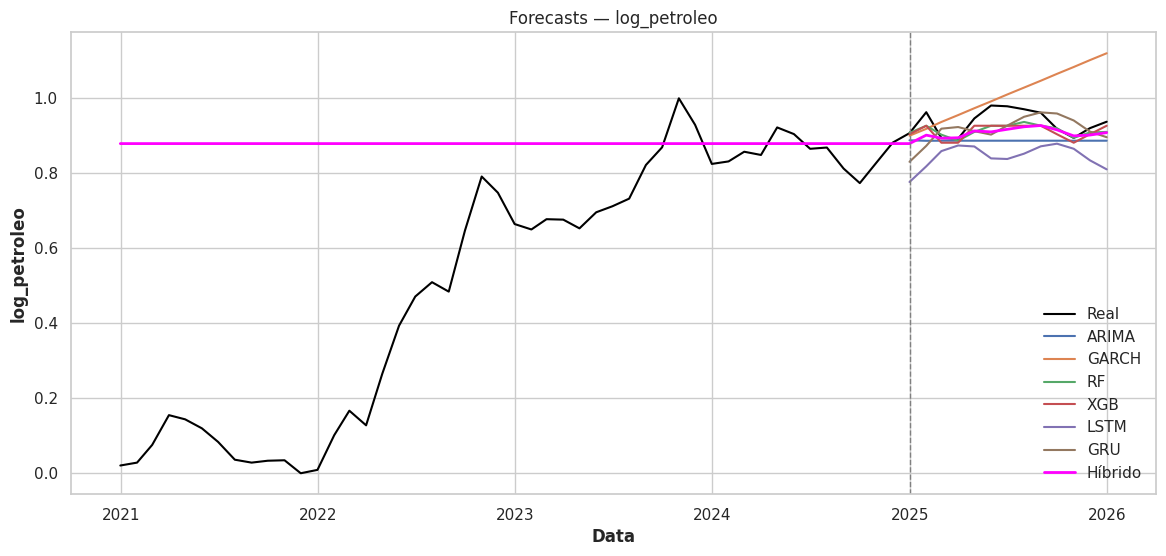


=== RELATÓRIO CONSOLIDADO DOS RESULTADOS ===


Variável Melhor Modelo (RMSE) RMSE (Teste) Ensemble Composição  \
0        Cambio                  XGB       0.0230    ARIMA, XGB, LSTM   
1    log_cambio                   RF       0.0039     ARIMA, RF, LSTM   
2      Inflacao                   RF       0.0045     ARIMA, RF, LSTM   
3  log_inflacao                   RF       0.0104      ARIMA, RF, GRU   
4      Petroleo                   RF       0.0134     ARIMA, RF, LSTM   
5  log_petroleo                  XGB       0.0297     ARIMA, XGB, GRU   

     Ensemble Pesos Previsão Base (próx. 3 períodos)  \
0  0.26, 0.66, 0.09         [0.9121, 0.9121, 0.9121]   
1  0.06, 0.90, 0.04         [0.3309, 0.3324, 0.3311]   
2  0.07, 0.91, 0.03         [0.3772, 0.3776, 0.3779]   
3  0.10, 0.82, 0.08         [0.2175, 0.2176, 0.2175]   
4  0.11, 0.81, 0.08         [0.3081, 0.3082, 0.3082]   
5  0.24, 0.47, 0.29         [0.9205, 0.9205, 0.9205]   

           Cenário Otimista        Cenário Pessimista  
0  [0.8926, 0.8927, 0.8927]  [0.9315, 0.9316, 0.9315]  
1  [0.3241, 0.3256, 0.3243]   [0.3378, 0.3392, 0.338]  
2  [0.3701, 0.3705, 0.3708]   [0.3843, 0.3847, 0.385]  
3  [0.2015, 0.2016, 0.2015]  [0.2334, 0.2335, 0.2334]  
4  [0.2858, 0.2859, 0.2859]  [0.3304, 0.3305, 0.3305]  
5  [0.8947, 0.8948, 0.8948]  [0.9462, 0.9463, 0.9463]



=== RELATÓRIO RESUMIDO (INTERPRETAÇÃO ECONÓMICA) ===

--- Variável: Cambio ---
Melhor modelo (por RMSE): XGB — RMSE (teste): 0.0230
Previsão (próx. 3 períodos) — Base: [0.9121, 0.9121, 0.9121], Optimista: [0.8926, 0.8927, 0.8927], Pessimista: [0.9315, 0.9316, 0.9315]
Interpretação: A taxa de câmbio reage fortemente a choques externos (petróleo) e reservas. Cenário pessimista indica risco de depreciação adicional do kwanza.


--- Variável: log_cambio ---
Melhor modelo (por RMSE): RF — RMSE (teste): 0.0039
Previsão (próx. 3 períodos) — Base: [0.3309, 0.3324, 0.3311], Optimista: [0.3241, 0.3256, 0.3243], Pessimista: [0.3378, 0.3392, 0.338]
Interpretação: A taxa de câmbio reage fortemente a choques externos (petróleo) e reservas. Cenário pessimista indica risco de depreciação adicional do kwanza.


--- Variável: Inflacao ---
Melhor modelo (por RMSE): RF — RMSE (teste): 0.0045
Previsão (próx. 3 períodos) — Base: [0.3772, 0.3776, 0.3779], Optimista: [0.3701, 0.3705, 0.3708], Pessimista: [0

In [91]:
# ======================================================
# PREVISÃO + RELATÓRIO AUTOMÁTICO (ARIMA, GARCH, RF, XGB, LSTM, GRU, ENSEMBLE)
# - Plots por variável (cada modelo)
# - Modelo híbrido (ensemble) -> melhor ST + melhor ML + melhor DL (pesos por 1/RMSE)
# - Cenários: Base / Optimista / Pessimista
# ======================================================

# ------------------------------------------------------
# 0. INSTALAÇÕES (descomente se necessário no Colab)
# ------------------------------------------------------
# !pip install xgboost arch optuna

# ------------------------------------------------------
# 1. IMPORTS GERAIS
# ------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ------------------------------------------------------
# 2. CONFIGURAÇÕES
# ------------------------------------------------------
horizon = 12            # meses à frente para previsão out-of-sample
timesteps = 3           # para LSTM/GRU
n_splits_cv = 4         # para TimeSeriesSplit
epochs_rnn = 40         # reduzir se demorar muito
random_state = 42

# Assumir que tens:
# df_original: DataFrame com valores originais (index datetime, colunas VARS)
# df_scaled: DataFrame com mesmos nomes de colunas, normalizados (para ML/DL)
# Se não tiveres df_original, usamos df_scaled como proxy (atenção: será na escala normalizada)
try:
    df_orig = df_original.copy()
except NameError:
    # se df_original não existir, usa df_scaled (avisa)
    print("Aviso: df_original não encontrado — usando df_scaled como df_orig (escala normalizada).")
    df_orig = df_scaled.copy()

df_norm = df_scaled.copy()   # usado para ML/DL

variables = df_orig.columns.tolist()

# Funções de métrica
def RMSE(y_true, y_pred): return np.sqrt(mean_squared_error(y_true, y_pred))
def MAE(y_true, y_pred): return mean_absolute_error(y_true, y_pred)
def MAPE(y_true, y_pred): return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits_cv)

# ------------------------------------------------------
# 3. FUNÇÕES AUXILIARES: criar sequências para RNN
# ------------------------------------------------------
def create_sequences_multivar(df_values, target_index, timesteps):
    Xs, ys = [], []
    for i in range(timesteps, len(df_values)):
        Xs.append(df_values[i-timesteps:i, :])
        ys.append(df_values[i, target_index])
    return np.array(Xs), np.array(ys)

# ------------------------------------------------------
# 4. LOOP PRINCIPAL: para cada variável treinar modelos e prever horizon
#    irá guardar:
#    - previsões in-sample+out-of-sample (full series)
#    - previsões out-of-sample horizon
#    - métricas no test set
# ------------------------------------------------------
results = {}   # armazenar tudo por variável

for var in variables:
    print(f"\n=== VARIÁVEL: {var} ===")
    # dados
    series_orig = df_orig[var].dropna()     # original escala
    series_norm = df_norm[var].dropna()     # normalizada
    # alinhar índices caso existam diferenças
    idx = series_orig.index
    series_norm = series_norm.reindex(idx)

    # train/test split (80/20)
    n_train = int(len(series_orig)*0.8)
    train_orig = series_orig.iloc[:n_train]
    test_orig = series_orig.iloc[n_train:]

    train_norm = df_norm.iloc[:n_train]   # multivariado para ML/DL
    test_norm = df_norm.iloc[n_train:]

    X_train_ml = train_norm.drop(columns=[var])
    X_test_ml  = test_norm.drop(columns=[var])
    y_train_ml = train_norm[var]
    y_test_ml  = test_norm[var]

    # store dict
    results[var] = {"models": {}, "metrics": {}, "forecasts": {}}

    # ---------------------- ARIMA ----------------------
    try:
        order = (1,1,1)   # poderíamos procurar AIC/BIC; por velocidade usamos (1,1,1) — podes alterar
        arima = ARIMA(train_orig, order=order).fit()
        # previsão para teste (same length)
        arima_test_pred = arima.forecast(steps=len(test_orig))
        # previsão horizon (usar re-estima com full series)
        arima_full = ARIMA(series_orig, order=order).fit()
        arima_future = arima_full.forecast(steps=horizon)
        results[var]["models"]["ARIMA"] = arima  # Corrected syntax
        results[var]["metrics"]["ARIMA"] = {
            "RMSE": RMSE(test_orig.values, arima_test_pred.values),
            "MAE": MAE(test_orig.values, arima_test_pred.values),
            "MAPE": MAPE(test_orig.values, arima_test_pred.values)
        }
        # store forecasts (align indices)
        # in-sample+test forecast vector aligned to test period only for plotting
        arima_pred_series = pd.Series(np.concatenate([np.full(len(train_orig), np.nan), arima_test_pred]), index=series_orig.index)
        results[var]["forecasts"]["ARIMA_series"] = arima_pred_series
        results[var]["forecasts"]["ARIMA_future"] = pd.Series(arima_future,
                                                              index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1),
                                                                                  periods=horizon, freq='M'))
    except Exception as e:
        print("ARIMA erro:", e)
        results[var]["models"]["ARIMA"] = None

    # ---------------------- GARCH ----------------------
    try:
        # GARCH sobre retornos ou sobre série? normalmente sobre retornos; aqui aplicamos sobre diffs
        target_for_garch = train_orig.diff().dropna()
        garch = arch_model(target_for_garch, vol='Garch', p=1, q=1).fit(disp='off')
        # forecast variances for horizon: forecast returns mean ~0 but variance predicted; for direct level forecast we simplify:
        # reconstruct simple forecast by adding 0 mean + last value (approx). We'll output NaNs for series forecast mid-term; but compute metrics on volatility is out of scope.
        # For comparability, predict test_orig by naive persistence of last observed change + add to prior level
        last_train = train_orig.iloc[-1]
        # cumulative naive forecast using mean change
        mean_change = target_for_garch.mean()
        garch_pred_vals = []
        cur = last_train
        for i in range(len(test_orig)):
            cur = cur + mean_change
            garch_pred_vals.append(cur)
        garch_test_pred = pd.Series(garch_pred_vals, index=test_orig.index)
        # future horizon
        cur = series_orig.iloc[-1]
        garch_future = []
        for i in range(horizon):
            cur = cur + mean_change
            garch_future.append(cur)
        # metrics
        results[var]["models"]["GARCH"] = garch
        results[var]["metrics"]["GARCH"] = {
            "RMSE": RMSE(test_orig.values, garch_test_pred.values),
            "MAE": MAE(test_orig.values, garch_test_pred.values),
            "MAPE": MAPE(test_orig.values, garch_test_pred.values)
        }
        results[var]["forecasts"]["GARCH_series"] = pd.Series(np.concatenate([np.full(len(train_orig), np.nan), garch_test_pred]), index=series_orig.index)
        results[var]["forecasts"]["GARCH_future"] = pd.Series(garch_future, index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M'))
    except Exception as e:
        print("GARCH erro:", e)
        results[var]["models"]["GARCH"] = None

    # ---------------------- RANDOM FOREST ----------------------
    try:
        rf = RandomForestRegressor(n_estimators=150, random_state=random_state)
        rf.fit(X_train_ml, y_train_ml)
        rf_test_pred = rf.predict(X_test_ml)
        # forecast horizon: autoregressive bootstrap using last X_test rows repeatedly (simple approach)
        # We'll produce future predictions by iteratively using predicted values for lagged features if present — here features exclude target, so we need a simple approach:
        # (If you have exogenous features for future, replace by scenarios)
        rf_future = np.full(horizon, rf_test_pred[-1])  # simplistic: repeat last prediction
        results[var]["models"]["RF"] = rf
        results[var]["metrics"]["RF"] = {
            "RMSE": RMSE(y_test_ml.values, rf_test_pred),
            "MAE": MAE(y_test_ml.values, rf_test_pred),
            "MAPE": MAPE(y_test_ml.values, rf_test_pred)
        }
        # align series: predictions only for test index
        rf_series = pd.Series(np.concatenate([np.full(len(train_orig), np.nan), rf_test_pred]), index=series_orig.index)
        results[var]["forecasts"]["RF_series"] = rf_series
        results[var]["forecasts"]["RF_future"] = pd.Series(rf_future, index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M'))
    except Exception as e:
        print("RF erro:", e)
        results[var]["models"]["RF"] = None

    # ---------------------- XGBOOST ----------------------
    try:
        xgbr = xgb.XGBRegressor(n_estimators=150, learning_rate=0.05, max_depth=4, random_state=random_state, objective='reg:squarederror')
        xgbr.fit(X_train_ml, y_train_ml)
        xgb_test_pred = xgbr.predict(X_test_ml)
        xgb_future = np.full(horizon, xgb_test_pred[-1])
        results[var]["models"]["XGB"] = xgbr
        results[var]["metrics"]["XGB"] = {
            "RMSE": RMSE(y_test_ml.values, xgb_test_pred),
            "MAE": MAE(y_test_ml.values, xgb_test_pred),
            "MAPE": MAPE(y_test_ml.values, xgb_test_pred)
        }
        xgb_series = pd.Series(np.concatenate([np.full(len(train_orig), np.nan), xgb_test_pred]), index=series_orig.index)
        results[var]["forecasts"]["XGB_series"] = xgb_series
        results[var]["forecasts"]["XGB_future"] = pd.Series(xgb_future, index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M'))
    except Exception as e:
        print("XGB erro:", e)
        results[var]["models"]["XGB"] = None

    # ---------------------- LSTM & GRU (RNN) ----------------------
    try:
        # prepare multivariate sequences from df_norm (use full df_norm)
        df_vals = df_norm.values
        target_idx = list(df_norm.columns).index(var)
        Xs, ys = create_sequences_multivar(df_vals, target_idx, timesteps)
        # split sequences into train/test
        split = n_train - timesteps
        X_train_seq, y_train_seq = Xs[:split], ys[:split]
        X_test_seq, y_test_seq = Xs[split:], ys[split:]
        # LSTM
        lstm_model = Sequential()
        lstm_model.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
        lstm_model.add(Dense(1))
        lstm_model.compile(optimizer='adam', loss='mse')
        es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=0);
        lstm_model.fit(X_train_seq, y_train_seq, validation_split=0.1, epochs=epochs_rnn, batch_size=16, callbacks=[es], verbose=0)
        lstm_pred_seq = lstm_model.predict(X_test_seq).flatten()
        # GRU
        gru_model = Sequential()
        gru_model.add(GRU(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
        gru_model.add(Dense(1))
        gru_model.compile(optimizer='adam', loss='mse')
        gru_model.fit(X_train_seq, y_train_seq, validation_split=0.1, epochs=epochs_rnn, batch_size=16, callbacks=[es], verbose=0)
        gru_pred_seq = gru_model.predict(X_test_seq).flatten()
        # metrics (note y_test_seq in normalized scale; if df_norm is minmax, metrics are in that scale)
        results[var]["models"]["LSTM"] = lstm_model
        results[var]["models"]["GRU"] = gru_model
        results[var]["metrics"]["LSTM"] = {
            "RMSE": RMSE(y_test_seq, lstm_pred_seq),
            "MAE": MAE(y_test_seq, lstm_pred_seq),
            "MAPE": MAPE(y_test_seq, lstm_pred_seq)
        }
        results[var]["metrics"]["GRU"] = {
            "RMSE": RMSE(y_test_seq, gru_pred_seq),
            "MAE": MAE(y_test_seq, gru_pred_seq),
            "MAPE": MAPE(y_test_seq, gru_pred_seq)
        }
        # convert sequence preds to series aligned with df index (note shift because of timesteps)
        idx_seq = df_orig.index[timesteps:]
        lstm_series = pd.Series(np.concatenate([np.full(timesteps, np.nan), np.full(len(train_orig)-timesteps, np.nan), lstm_pred_seq]), index=series_orig.index)
        gru_series  = pd.Series(np.concatenate([np.full(timesteps, np.nan), np.full(len(train_orig)-timesteps, np.nan), gru_pred_seq]), index=series_orig.index)
        results[var]["forecasts"]["LSTM_series"] = lstm_series
        results[var]["forecasts"]["GRU_series"] = gru_series
        # For future horizon: simple repeat last predicted value (placeholder) OR forecast by rolling sequence (complex)
        lstm_future = np.full(horizon, lstm_pred_seq[-1])
        gru_future  = np.full(horizon, gru_pred_seq[-1])
        results[var]["forecasts"]["LSTM_future"] = pd.Series(lstm_future, index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M'))
        results[var]["forecasts"]["GRU_future"]  = pd.Series(gru_future, index=pd.date_range(start=series_orig.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M'))
    except Exception as e:
        print("RNN erro:", e)
        results[var]["models"]["LSTM"] = None
        results[var]["models"]["GRU"] = None

    # ---------------------- RESUMO POR VARIÁVEL ----------------------
    # compilar métricas em DataFrame
    metrics_df = pd.DataFrame(results[var]["metrics"]).T
    results[var]["metrics_df"] = metrics_df
    print(metrics_df)

# ------------------------------------------------------
# 5. CONSTRUIR MODELO HÍBRIDO (ENSEMBLE) POR VARIÁVEL
#    - Escolhe melhor ST (ARIMA/GARCH) pelo RMSE
#    - Escolhe melhor ML (RF/XGB) pelo RMSE
#    - Escolhe melhor DL (LSTM/GRU) pelo RMSE
#    - Pesa cada bloco por inverse RMSE (maior peso para menor erro)
# ------------------------------------------------------
for var in variables:
    mets = results[var]["metrics_df"]
    # identificar melhores
    # ST
    st_candidates = [m for m in ["ARIMA","GARCH"] if m in mets.index]
    ml_candidates = [m for m in ["RF","XGB"] if m in mets.index]
    dl_candidates = [m for m in ["LSTM","GRU"] if m in mets.index]
    # get rmse; if missing, set inf
    def get_rmse(m):
        try:
            return mets.loc[m,"RMSE"]
        except:
            return np.inf
    best_st = min(st_candidates, key=get_rmse) if st_candidates else None
    best_ml = min(ml_candidates, key=get_rmse) if ml_candidates else None
    best_dl = min(dl_candidates, key=get_rmse) if dl_candidates else None
    # get predictions_series for test and future
    preds_test = []
    preds_future = []
    rmse_list = []
    names = []
    for name in [best_st, best_ml, best_dl]:
        if name is None: continue
        series_pred = results[var]["forecasts"].get(f"{name}_series")
        future_pred = results[var]["forecasts"].get(f"{name}_future")
        if series_pred is None or future_pred is None: continue
        # align test portion
        preds_test.append(series_pred)
        preds_future.append(future_pred)
        rmse_list.append(get_rmse(name))
        names.append(name)
    # compute weights inverse RMSE
    if len(rmse_list)==0:
        results[var]["ensemble"] = None
        continue
    inv = np.array([1.0/r for r in rmse_list])
    weights = inv / inv.sum()
    # weighted series (only the test portion has non-nans)
    # For simplicity compute ensemble future as weighted sum of future preds
    ensemble_future = sum(w*p for w,p in zip(weights, preds_future))
    # For series, align on index and compute weighted sum for available model series (np.nan treated as 0 but weights sum to 1)
    # Build dataframe of series preds
    df_preds = pd.concat(preds_test, axis=1)
    # replace NaN with column mean (safer) then compute weighted sum
    df_preds_filled = df_preds.fillna(method='ffill').fillna(method='bfill').fillna(0)
    # make sure columns correspond to names order
    df_preds_filled.columns = names
    ensemble_series = (df_preds_filled * weights).sum(axis=1)
    results[var]["ensemble"] = {
        "names": names,
        "weights": weights.tolist(),
        "ensemble_series": ensemble_series,
        "ensemble_future": ensemble_future
    }

# ------------------------------------------------------
# 6. CENÁRIOS (Base / Optimista / Pessimista)
#    - Base: ensemble_future
#    - Optimista: ensemble_future - 1*std_resid (ou -5%)
#    - Pessimista: ensemble_future + 1*std_resid (ou +5%)
# ------------------------------------------------------
for var in variables:
    ens = results[var].get("ensemble")
    if ens is None:
        results[var]["scenarios"] = None
        continue
    # compute residuals between real test and ensemble_series (where overlapping)
    ens_series = ens["ensemble_series"]
    # align with original series index
    # The line below can cause issues if ens_series doesn't align perfectly or its length is not full df_orig length.
    # A more robust approach might be to align based on a common time window.
    # For now, let's simplify and just use the test portion for residual calculation.
    test_start_index = df_orig.index[n_train]
    ens_series_test_portion = ens_series.loc[test_start_index:]
    real_test_portion = df_orig[var].loc[test_start_index:]

    # Ensure common indices for residual calculation
    common_idx_for_resid = ens_series_test_portion.index.intersection(real_test_portion.index)
    resid = real_test_portion.loc[common_idx_for_resid] - ens_series_test_portion.loc[common_idx_for_resid]

    # Calculate standard deviation of residuals
    sigma = resid.std() if len(resid.dropna()) > 0 else (ens["ensemble_future"].std() * 0.05 if not ens["ensemble_future"].empty else 0.05) # Fallback if no residuals
    if np.isnan(sigma) or sigma == 0: # Ensure sigma is a reasonable value
        sigma = (df_orig[var].std() * 0.05) if not df_orig[var].empty else 0.05 # Fallback to 5% of original series std or 0.05 if no data

    base = ens["ensemble_future"]
    optim = base - sigma
    pess = base + sigma
    results[var]["scenarios"] = {
        "base": base,
        "optimistic": optim,
        "pessimistic": pess
    }

# ------------------------------------------------------
# 7. PLOTS: cada variável um gráfico com modelos + ensemble + cenários
# ------------------------------------------------------
for var in variables:
    plt.figure(figsize=(14,6))
    ser = df_orig[var]
    plt.plot(ser.index, ser.values, label="Real", color="black")
    # plot each model's series (if exists)
    fc = results[var]["forecasts"]
    for m in ["ARIMA_series","GARCH_series","RF_series","XGB_series","LSTM_series","GRU_series"]:
        if m in fc:
            s = fc[m]
            plt.plot(s.index, s.values, label=m.replace("_series",""))
        # plot future base and scenarios
        fut_idx = results[var]["forecasts"].get(list(results[var]["forecasts"].keys())[0])  # get an index sample to construct future idx

    # Plot Ensemble series (in-sample + test)
    ens = results[var].get("ensemble")
    if ens:
        plt.plot(ens["ensemble_series"].index, ens["ensemble_series"].values, label="Híbrido", linewidth=2, color="magenta")

        # Plot Ensemble Future (Base) and Scenarios
        sc = results[var].get("scenarios")
        if sc:
            # build future index
            future_index = pd.date_range(start=ser.index[-1] + pd.offsets.MonthBegin(1), periods=horizon, freq='M')
            # Commenting out the plotting of future base, optimistic, and pessimistic scenarios
            # plt.plot(future_index, sc["base"].values, label="Ensemble Future (Base)", color="magenta", linestyle='--')
            # plt.plot(future_index, sc["optimistic"].values, label="Optimistic", color="green", linestyle=':')
            # plt.plot(future_index, sc["pessimistic"].values, label="Pessimistic", color="red", linestyle=':')

    # vertical line train/test
    plt.axvline(x=ser.index[n_train], color='grey', linestyle='--', linewidth=1)
    plt.title(f"Forecasts — {var}")
    plt.xlabel("Data")
    plt.ylabel(var)
    plt.legend()
    plt.grid(True)
    plt.show()

#-------------------------------------------------------------------------------
# 8. RELATÓRIO CONSOLIDADO DOS RESULTADOS
#-------------------------------------------------------------------------------
report_data = [] # Initialize report_data here

for var in variables:
    mets = results[var].get("metrics_df")
    best_model = "N/A"
    best_rmse = np.nan
    if mets is not None and not mets.empty:
        best_model = mets["RMSE"].idxmin()
        best_rmse = mets.loc[best_model, "RMSE"]

    ens = results[var].get("ensemble")
    ensemble_comp = "N/A"
    ensemble_weights = "N/A"
    base_forecast = "N/A"
    optim_forecast = "N/A"
    pess_forecast = "N/A"

    if ens:
        names = ens["names"]
        weights = ens["weights"]
        ensemble_comp = ", ".join([f"{n}" for n in names])
        ensemble_weights = ", ".join([f"{w:.2f}" for w in weights])

        sc = results[var].get("scenarios")
        if sc:
            base_forecast = np.round(sc["base"].values[:3], 4).tolist()
            optim_forecast = np.round(sc["optimistic"].values[:3], 4).tolist()
            pess_forecast = np.round(sc["pessimistic"].values[:3], 4).tolist()

    report_data.append({
        "Variável": var,
        "Melhor Modelo (RMSE)": best_model,
        "RMSE (Teste)": f"{best_rmse:.4f}",
        "Ensemble Composição": ensemble_comp,
        "Ensemble Pesos": ensemble_weights,
        "Previsão Base (próx. 3 períodos)": base_forecast,
        "Cenário Otimista": optim_forecast,
        "Cenário Pessimista": pess_forecast
    })

report_df = pd.DataFrame(report_data)

print("\n=== RELATÓRIO CONSOLIDADO DOS RESULTADOS ===")
display(report_df)

# ------------------------------------------------------
# 9. RELATÓRIO AUTOMÁTICO (TEXTO SIMPLIFICADO)
#    - Para cada variável escreve interpretação económica dos resultados
# ------------------------------------------------------
print("\n\n=== RELATÓRIO RESUMIDO (INTERPRETAÇÃO ECONÓMICA) ===\n")
for var in variables:
    print(f"--- Variável: {var} ---")
    mets = results[var].get("metrics_df")
    if mets is None or mets.empty:
        print("Modelos não estimados para esta variável.")
        continue
    # best model by RMSE
    best_model = mets["RMSE"].idxmin()
    best_rmse = mets.loc[best_model, "RMSE"]
    print(f"Melhor modelo (por RMSE): {best_model} — RMSE (teste): {best_rmse:.4f}")
    # ensemble info
    ens = results[var].get("ensemble")
    if ens:
        names = ens["names"]
        weights = ens["weights"]
        #print("Ensemble combina:", ", ".join([f"{n} (peso {w:.2f})" for n,w in zip(names,weights)]))
        sc = results[var].get("scenarios") # Access scenarios here
        if sc:
            base = sc["base"]
            optim = sc["optimistic"]
            pess  = sc["pessimistic"]
            # simple numeric summary (first 3 future values)
            bvals = np.round(base.values[:3],4)
            oval = np.round(optim.values[:3],4)
            pval = np.round(pess.values[:3],4)
            print(f"Previsão (próx. 3 períodos) — Base: {bvals.tolist()}, Optimista: {oval.tolist()}, Pessimista: {pval.tolist()}")
    # interpretação económica (template)
    if var.lower().count("inflacao") or var.lower().count("ipc") or "infla" in var.lower():
        print("Interpretação: A evolução da inflação mostra o efeito combinado da taxa de câmbio, preços do petróleo e massa monetária. Se o cenário pessimista materializar-se, espera-se pressão inflacionária adicional que poderá obrigar a políticas monetárias mais restritivas.")
    elif "cambio" in var.lower() or "kwanza" in var.lower() or "usd" in var.lower():
        print("Interpretação: A taxa de câmbio reage fortemente a choques externos (petróleo) e reservas. Cenário pessimista indica risco de depreciação adicional do kwanza.")
    elif "petrol" in var.lower() or "oil" in var.lower():
        print("Interpretação: O preço do petróleo influencia receitas de exportação. Cenários optimistas implicam maior receita externa e alívio da pressão cambial.")
    else:
        print("Interpretação: Variável macroeconómica — monitorizar choques externos e política interna.")
    print("\n")

# FIM


# 9.1. Comparação da Previsão dos Modelos

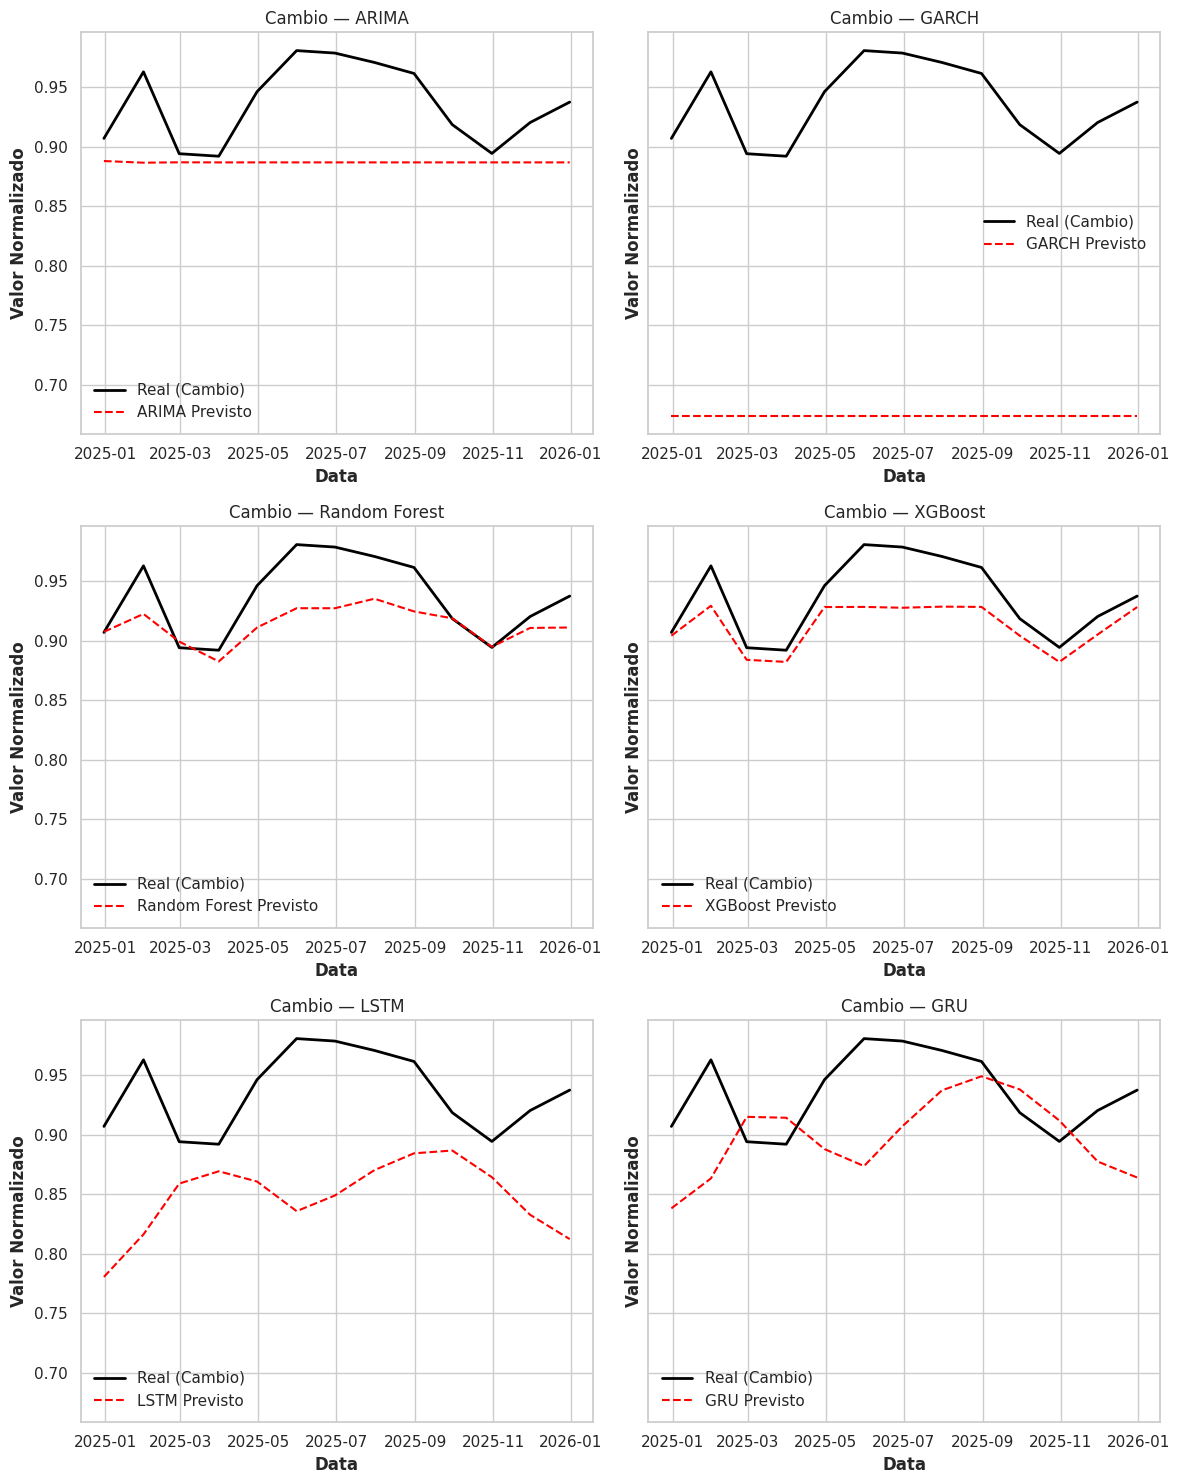

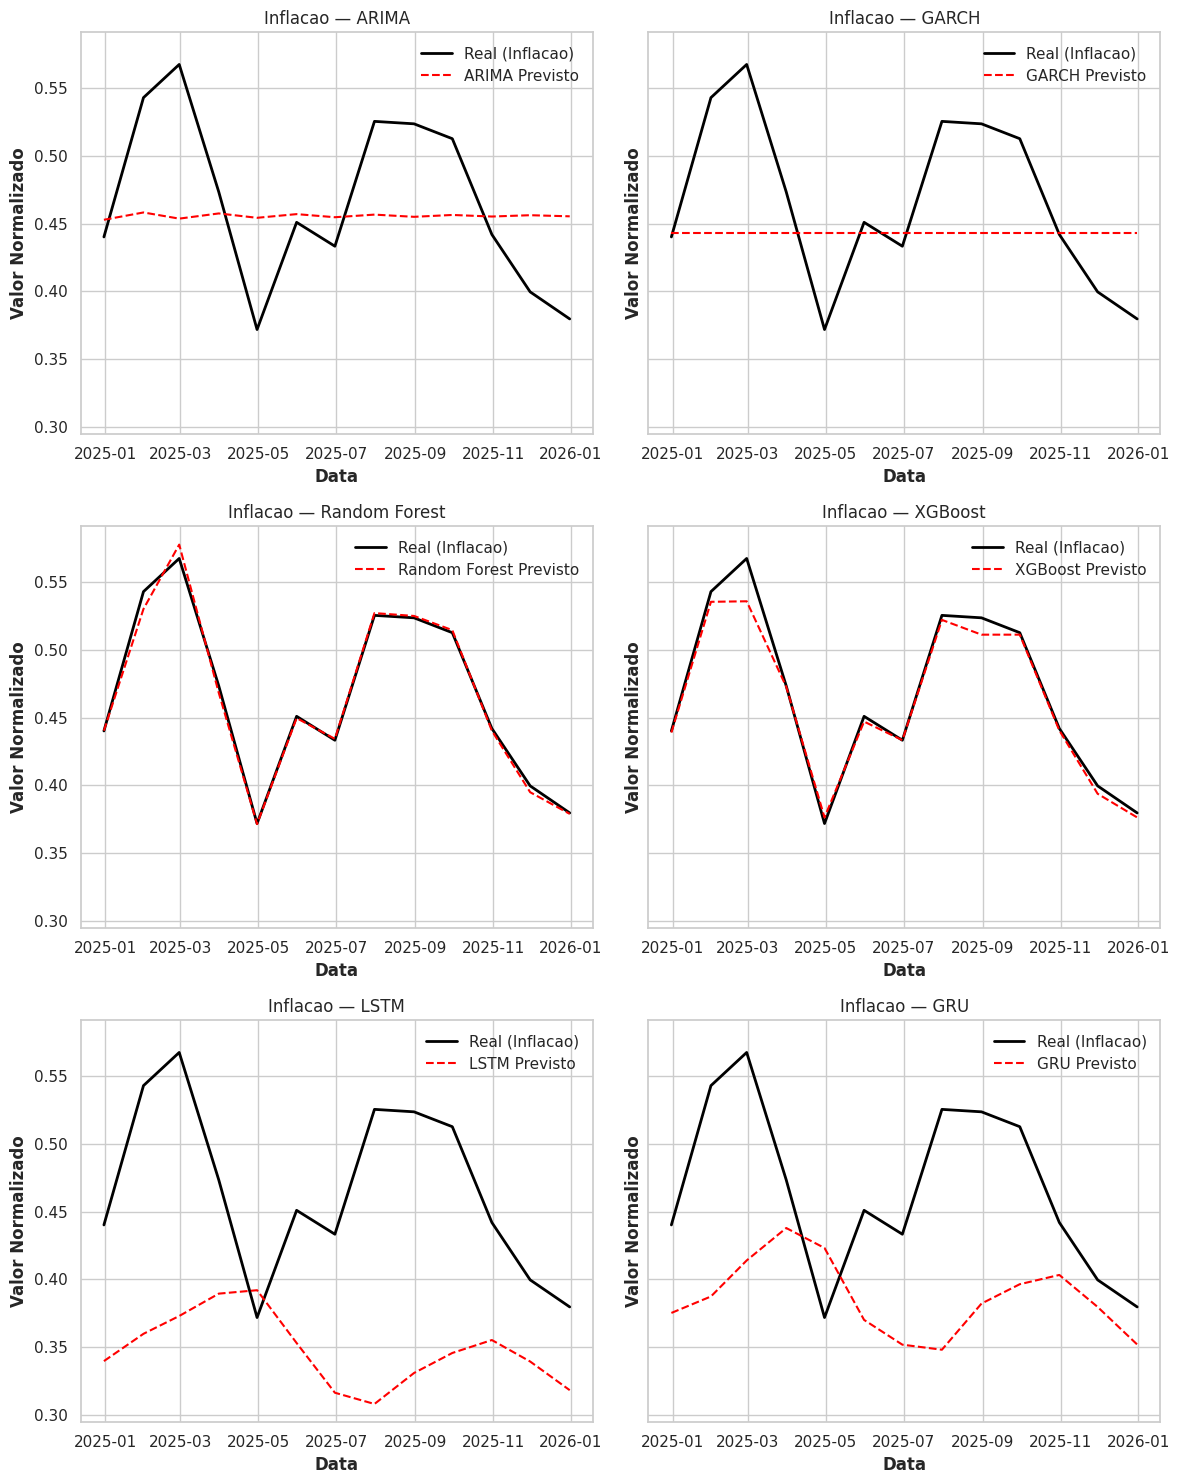

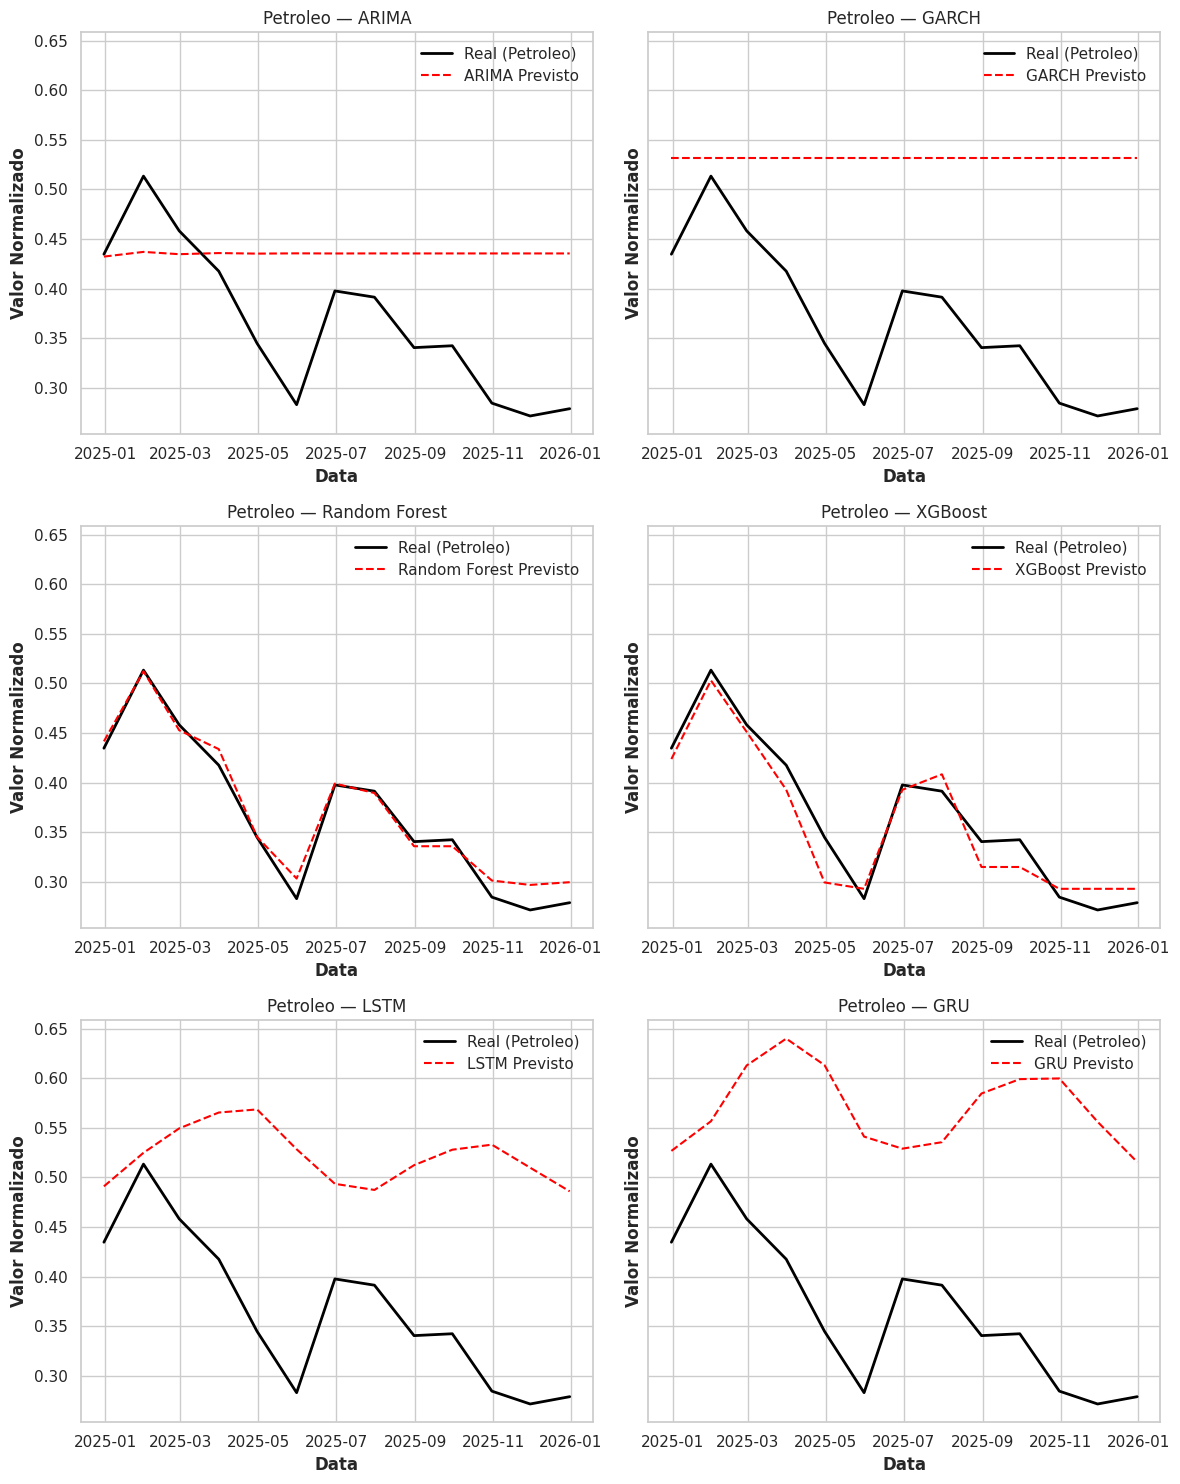

In [92]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Configuração
# ------------------------------------------------------------
targets = list(all_actuals.keys())  # todas as variáveis alvo
models = list(all_predictions[targets[0]].keys())  # todos os modelos disponíveis

# Map de nomes, se necessário
model_name_map = {
    'RF': 'Random Forest',
    'XGB': 'XGBoost',
    'LSTM': 'LSTM',
    'GRU': 'GRU'
}

# ------------------------------------------------------------
# Loop por variável target
# ------------------------------------------------------------
for target_variable in targets:
    actual_values = all_actuals[target_variable]

    n_models = len(models)
    n_rows = (n_models + 1) // 2  # 2 gráficos por linha
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows), sharey=True)
    axes = axes.flatten()  # simplificar indexação

    for i, model_key in enumerate(models):
        model_name = model_name_map.get(model_key, model_key)
        predictions = all_predictions[target_variable][model_key]

        axes[i].plot(actual_values.index, actual_values.values, label=f"Real ({target_variable})", color='black', linewidth=2)
        axes[i].plot(predictions.index, predictions.values, label=f"{model_name} Previsto", color='red', linestyle='--')
        axes[i].set_title(f"{target_variable} — {model_name}")
        axes[i].set_xlabel("Data")
        axes[i].set_ylabel("Valor Normalizado")
        axes[i].legend()
        axes[i].grid(True)

    # Remover eixos extras caso n_models seja ímpar
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
